**Contents in the Notebook**

- <a href='#Part2'> DATA ANALYSIS OF GLOBAL TERRORISM</a>
  - <a href='#Getting Data Ready2'> 1. Getting Data Ready</a>
  - <a href='#Displaying the different features of the DataSet2'> 2. Displaying the different features of the DataSet</a>
  - <a href='#Data Cleaning and Munging'>3. Data Cleaning and Munging</a>
  - <a href='#Some Basic Analysis on Global Terror Attacks2'> 4. Some Basic Analysis on Global Terror Attacks</a>
  - <a href='#Terrorism in India'>5. Terrorism in India</a>
   - <a href='#History of Terrorism in India'>5.1 History of Terrorism in India</a>
   - <a href='#Most Active Terrorist group in India '>5.2 Most Active Terrorist group in India </a>
   - <a href='#Most Affected City in India '>5.3 Most Affected City in India </a>
   - <a href='#Favourite Target of top 10 Terrorist Group in India'>5.4 Favourite Target of top 10 Terrorist Group in India</a>
  - <a href='#Terrorism in Pakistan'>6. Terrorism in Pakistan</a>
  - <a href='#Terrorism in Nepal'>7. Terrorism in Nepal</a>
  - <a href='#Terrorism in Afghanistan'>8. Terrorism in Afghanistan</a>
  - <a href='#Terrorism in Iraq'>9. Terrorism in Iraq</a>
  - <a href='#Terrorism in Syria'>10. Terrorism in Syria</a>
  - <a href='#Terrorism in Nigeria'>11. Terrorism in Nigeria</a>


# <a id='Part2'>$\color{red}{\text{DATA ANALYSIS OF GLOBAL TERRORISM}}$</a>

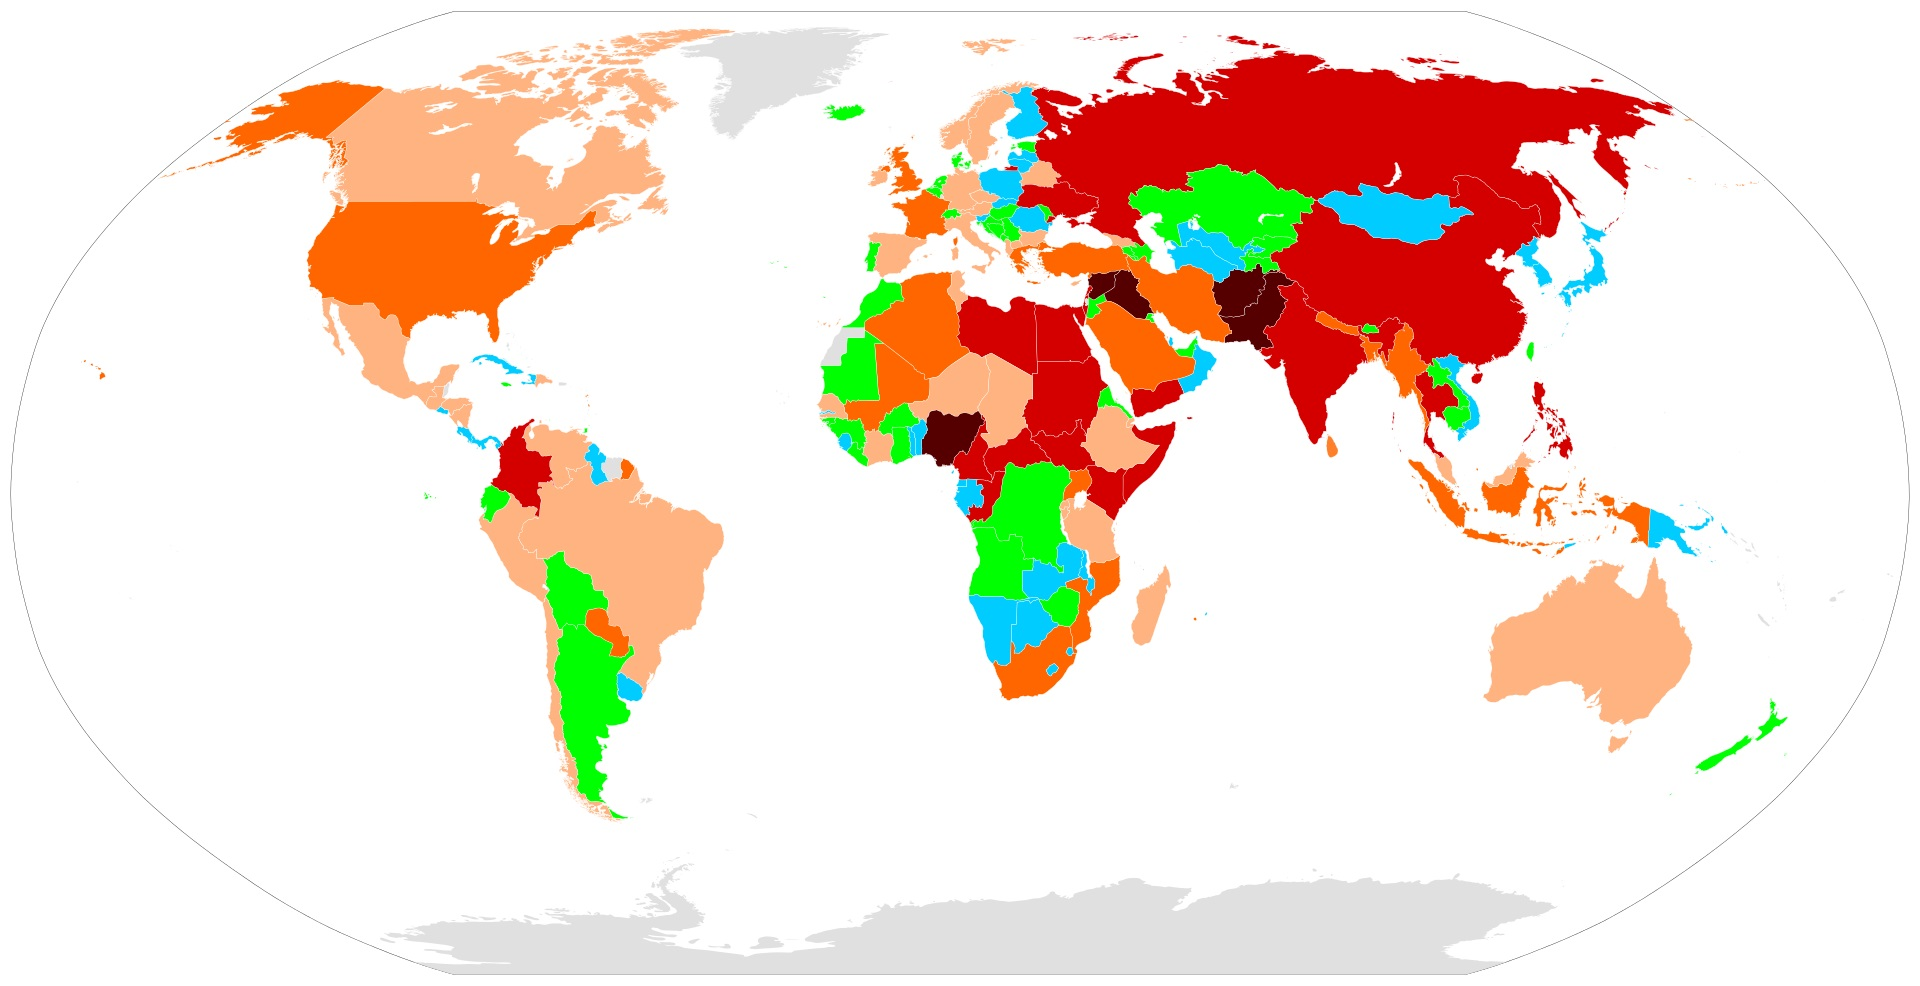

Terrorism causes significant  threat to international security, political and social stability, and economic development of a country. Till date we have not been successful in completely abolishing terrorism from the world. Still the terrorist groups exist, still we hear of deadly incidents and still the world is not a ‘Peaceful Place to live in’.  
A detailed analysis on such attacks, on terrorist groups prevalent across several target countries, and other important attributes of each attack is made here.  The analysis helps to understand the nature and severity of the attacks, behavioural aspects of several terrorist groups and their favourite target spots.

### <a id='Getting Data Ready2'>1. Getting Data Ready</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
import copy
from seaborn import set

In [2]:
try:
    data = pd.read_csv('E:\DataSet.csv')
    print('File successfully loaded into the DataFrame..')
except:
    print("File not found...")

File successfully loaded into the DataFrame..


### <a id='Displaying the different features of the DataSet2'>2. Displaying the different features of the DataSet</a>

In [3]:
data.columns

Index(['iyear', 'imonth', 'iday', 'country_txt', 'city', 'attacktype1_txt',
       'targtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'gname',
       'weaptype1_txt', 'weapsubtype1_txt', 'weapdetail', 'nkill', 'nwound',
       'propextent_txt', 'ransomamt'],
      dtype='object')

In [4]:
data.head(3)

iyear  imonth  iday country_txt     city    attacktype1_txt targtype1_txt  \
0   2012       1     1       Kenya  Garissa      Armed Assault      Business   
1   2012       1     1    Pakistan      Sui  Bombing/Explosion      Military   
2   2012       1     1       Kenya  Garissa      Armed Assault      Business   

                 corp1   target1 natlty1_txt                         gname  \
0            Locus Pub       Bar       Kenya                    Al-Shabaab   
1  Frontier Corps (FC)  Soldiers    Pakistan  Baloch Republican Army (BRA)   
2              Unknown       Bar       Kenya                    Al-Shabaab   

               weaptype1_txt weapsubtype1_txt  \
0  Explosives/Bombs/Dynamite          Grenade   
1  Explosives/Bombs/Dynamite        Land Mine   
2  Explosives/Bombs/Dynamite          Grenade   

                                          weapdetail  nkill  nwound  \
0  Two grenades and AK-47 assault rifles were use...    3.0    14.0   
1                                                NaN    4.0     3.0   
2                                                NaN    2.0    14.0   

                propextent_txt  ransomamt  
0  Minor (likely < $1 million)        NaN  
1  Minor (likely < $1 million)        NaN  
2  Minor (likely < $1 million)        NaN

In [5]:
data.tail(3)

iyear  imonth  iday                       country_txt        city  \
43912   2016      12    31  Democratic Republic of the Congo  Nakolongbo   
43913   2016      12    31                            Mexico   Guachochi   
43914   2016      12    30                             Sudan     Nertiti   

                   attacktype1_txt                targtype1_txt  \
43912  Hostage Taking (Kidnapping)  Private Citizens & Property   
43913                Assassination          Journalists & Media   
43914                Armed Assault  Private Citizens & Property   

                    corp1                                           target1  \
43912  Nakolongbo Village                                           Village   
43913              Norawa  Residence of Journalist: Gabriel Valencia Juarez   
43914       Nierteti Town                                              Town   

                            natlty1_txt                         gname  \
43912  Democratic Republic of the Congo  Lord's Resistance Army (LRA)   
43913                            Mexico                       Unknown   
43914                             Sudan     Sudan Liberation Movement   

      weaptype1_txt  weapsubtype1_txt  \
43912       Unknown               NaN   
43913      Firearms           Handgun   
43914      Firearms  Unknown Gun Type   

                                           weapdetail  nkill  nwound  \
43912                                             NaN    0.0     NaN   
43913  Multiple 9-mm pistols were used in the attack.    0.0     0.0   
43914                                             NaN    0.0     0.0   

                    propextent_txt  ransomamt  
43912                          NaN        NaN  
43913  Minor (likely < $1 million)        NaN  
43914                          NaN        NaN

In [6]:
data.shape

(43915, 18)

In [7]:
data.dtypes

iyear                 int64
imonth                int64
iday                  int64
country_txt          object
city                 object
attacktype1_txt      object
targtype1_txt        object
corp1                object
target1              object
natlty1_txt          object
gname                object
weaptype1_txt        object
weapsubtype1_txt     object
weapdetail           object
nkill               float64
nwound              float64
propextent_txt       object
ransomamt           float64
dtype: object

In [8]:
data.rename({'iyear':'year','imonth':'month','iday':'day','country_txt':'country',\
               'attacktype1_txt':'attack','targtype1_txt':'target', 'corp1':'target_inst',\
               'target1':'target_pop', 'natlty1_txt':'nationality','gname':'group',\
               'weaptype1_txt':'weapon_type', 'weapsubtype1_txt':'weapon_subtype',\
               'nkill':'kill','nwound':'wound','propextent_txt':'property_damg', \
               'ransomamt':'ransom'}, axis='columns',inplace=True)

In [9]:
data.columns

Index(['year', 'month', 'day', 'country', 'city', 'attack', 'target',
       'target_inst', 'target_pop', 'nationality', 'group', 'weapon_type',
       'weapon_subtype', 'weapdetail', 'kill', 'wound', 'property_damg',
       'ransom'],
      dtype='object')

In [10]:
data.info()  # General information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43915 entries, 0 to 43914
Data columns (total 18 columns):
year              43915 non-null int64
month             43915 non-null int64
day               43915 non-null int64
country           43915 non-null object
city              43915 non-null object
attack            43915 non-null object
target            43915 non-null object
target_inst       43915 non-null object
target_pop        43915 non-null object
nationality       43342 non-null object
group             43915 non-null object
weapon_type       43915 non-null object
weapon_subtype    39346 non-null object
weapdetail        16985 non-null object
kill              41290 non-null float64
wound             39313 non-null float64
property_damg     15615 non-null object
ransom            273 non-null float64
dtypes: float64(3), int64(3), object(12)
memory usage: 6.0+ MB


In [11]:
data.describe()  # Describing the statistical information only for numerical columns

year         month           day          kill         wound  \
count  43915.000000  43915.000000  43915.000000  41290.000000  39313.000000   
mean    2014.688079      6.442537     15.664716      3.110463      3.504006   
std        1.229350      3.390650      8.778536     13.343306     13.988988   
min     2012.000000      1.000000      1.000000      0.000000      0.000000   
25%     2014.000000      4.000000      8.000000      0.000000      0.000000   
50%     2015.000000      6.000000     15.000000      1.000000      0.000000   
75%     2016.000000      9.000000     23.000000      2.000000      3.000000   
max     2016.000000     12.000000     31.000000   1500.000000   1500.000000   

             ransom  
count  2.730000e+02  
mean   4.066460e+06  
std    2.180638e+07  
min   -9.900000e+01  
25%   -9.900000e+01  
50%    1.586045e+04  
75%    2.189562e+05  
max    2.000000e+08

### <a id='Data Cleaning and Munging'>3. Data Cleaning and Munging</a>

In [12]:
data.isnull().sum() # Sum of null values in each column

year                  0
month                 0
day                   0
country               0
city                  0
attack                0
target                0
target_inst           0
target_pop            0
nationality         573
group                 0
weapon_type           0
weapon_subtype     4569
weapdetail        26930
kill               2625
wound              4602
property_damg     28300
ransom            43642
dtype: int64

### $\color{red}{\text{Heat Map}}$ before filing up null values with suitable data

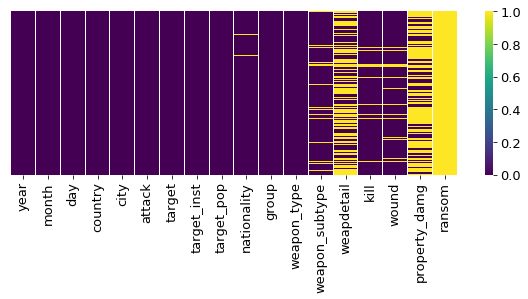

In [13]:
plt.figure(figsize=(10,3))
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

* Most of the ransom amounts,property-damage extents,weapon details have null values
* Most terrorits were interested in mass killing than procuring money to release hostage!

### 3.1 Dealing with the null values of nationality

In [14]:
data[['country','nationality']].head(10)

country                       nationality
0                             Kenya                             Kenya
1                          Pakistan                          Pakistan
2                             Kenya                             Kenya
3                       Afghanistan                     International
4  Democratic Republic of the Congo  Democratic Republic of the Congo
5                     United States                     United States
6                             India                             India
7                       Afghanistan                       Afghanistan
8                           Senegal                           Senegal
9                           Somalia                           Somalia

It seems the values in the country of the terrorist attack and the nationality of terrorist is same as seen from the above data.
Therefore, We can deal with the null value of the nationality column by replacing the values with country column.

In [15]:
# impute_nationality function will be applied tO replace the null values in nationality column
def impute_nationality(cols):
    Country = cols[0]
    Nationality = cols[1]
    if pd.isnull(Nationality):
        return Country
    else:
        return Nationality

In [16]:
data['nationality'] = data[['country','nationality']].apply(impute_nationality, axis = 1)

In [17]:
print('The null values in nationality coulmn is ',data['nationality'].isnull().sum())

The null values in nationality coulmn is  0


### 3.2 Dealing with duplicates in the data set

In [18]:
print('The no. of duplicates in the data are',data.duplicated().sum())

The no. of duplicates in the data are 1968


In [19]:
data[data.duplicated()].head(3)   # Displaying the first 3 duplicates

year  month  day  country      city                          attack  \
56   2012      1    6  Nigeria  Potiskum  Facility/Infrastructure Attack   
164  2012      1   20  Nigeria      Kano               Bombing/Explosion   
165  2012      1   20  Nigeria      Kano               Bombing/Explosion   

       target                 target_inst      target_pop nationality  \
56   Business                     Unknown            Bank     Nigeria   
164    Police  Nigeria Police Force (NPF)  Police Station     Nigeria   
165    Police  Nigeria Police Force (NPF)  Police Station     Nigeria   

          group                weapon_type          weapon_subtype weapdetail  \
56   Boko Haram                   Firearms        Unknown Gun Type        NaN   
164  Boko Haram  Explosives/Bombs/Dynamite  Unknown Explosive Type        NaN   
165  Boko Haram  Explosives/Bombs/Dynamite  Unknown Explosive Type        NaN   

     kill  wound                property_damg  ransom  
56    0.0    0.0  Minor (likely < $1 million)     NaN  
164  17.0    5.0  Minor (likely < $1 million)     NaN  
165  17.0    5.0  Minor (likely < $1 million)     NaN

In [20]:
data.drop_duplicates(inplace=True)   # Dropping the duplicated items

### 3.3 Dealing with null values  in kill and wound column

In [21]:
#Drop the column which has kill null and wound null
data.drop(data.loc[(data.kill.isnull())&(data.wound.isnull())].index,inplace = True)

In [22]:
#Drop the column which has kill and group Unknown
data.drop(data.loc[(data.kill.isnull())&(data.group=='Unknown')].index,inplace=True)

In [23]:
#Create a dataframe dd to store the mean of kill and wound based on weapon_subtype
dd = data.groupby('weapon_subtype').mean()[['kill','wound']].reset_index()
dd = dd.astype({'kill':int,'wound':int},inplace=True)

In [24]:
# We will replace the remaining null values in kill and wound by mean values
def impute_kill(cols):
    kill = cols[0]
    wp_sb = cols[1]
    if pd.isnull(kill):
        return dd[dd.weapon_subtype==wp_sb].kill.sum()
    else: 
        return kill

def impute_wound(cols):
    wound = cols[0]
    wp_sb = cols[1]
    if pd.isnull(wound):
        
        return dd[dd.weapon_subtype==wp_sb].wound.sum()
    else:
        return wound

In [25]:
data['kill']=data[['kill','weapon_subtype']].apply(impute_kill,axis=1)

In [26]:
data['wound']=data[['wound','weapon_subtype']].apply(impute_wound,axis=1)

### $\color{red}{\text{Heat Map}}$ after filing up null values for kill and wound

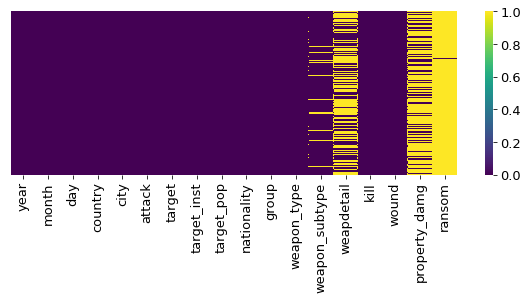

In [27]:
plt.figure(figsize=(10,3))
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

### 3.4 Dealing with null values  in weapon_subtype, weapdetail, ransom and property_damp column

In [28]:
# Dealing with the null values of weapon_subtype, weapdetail, ransom and property_damg
data['weapon_subtype'].fillna('Unknown', inplace = True)
data['weapdetail'].fillna('Unknown', inplace = True)
data['ransom'].fillna(0, inplace = True)
data['property_damg'].fillna('no record', inplace = True)

### $\color{red}{\text{Heat Map}}$ after filing up null values for  weapon_subtype, weapdetail, ransom and property_damp column

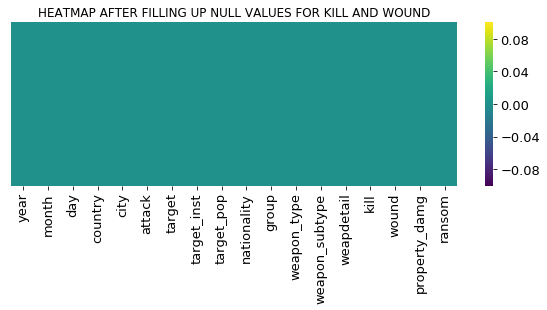

In [29]:
plt.figure(figsize=(10,3))
plt.rcParams['ytick.labelsize']=13
plt.rcParams['xtick.labelsize']=13
plt.title('HEATMAP AFTER FILLING UP NULL VALUES FOR KILL AND WOUND')
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

Now we have neat and clear data

In [30]:
# Adding a new column Casualties which shows the no. of people killed and wounded in a particular attack
data['casualties']= data['kill'] + data['wound']

In [31]:
data.head(3)

year  month  day   country     city             attack    target  \
0  2012      1    1     Kenya  Garissa      Armed Assault  Business   
1  2012      1    1  Pakistan      Sui  Bombing/Explosion  Military   
2  2012      1    1     Kenya  Garissa      Armed Assault  Business   

           target_inst target_pop nationality                         group  \
0            Locus Pub        Bar       Kenya                    Al-Shabaab   
1  Frontier Corps (FC)   Soldiers    Pakistan  Baloch Republican Army (BRA)   
2              Unknown        Bar       Kenya                    Al-Shabaab   

                 weapon_type weapon_subtype  \
0  Explosives/Bombs/Dynamite        Grenade   
1  Explosives/Bombs/Dynamite      Land Mine   
2  Explosives/Bombs/Dynamite        Grenade   

                                          weapdetail  kill  wound  \
0  Two grenades and AK-47 assault rifles were use...   3.0   14.0   
1                                            Unknown   4.0    3.0   
2                                            Unknown   2.0   14.0   

                 property_damg  ransom  casualties  
0  Minor (likely < $1 million)     0.0        17.0  
1  Minor (likely < $1 million)     0.0         7.0  
2  Minor (likely < $1 million)     0.0        16.0

### <a id='Some Basic Analysis on Global Terror Attacks'> 4. Some Basic Analysis on Global Terror Attacks</a>

In [32]:
max_killed = data['kill'].max()
idx = data[data.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,'in',data.at[idx,'city'],',',data.at[idx,'country'],\
     'through',data.at[idx,'attack'],'by',data.at[idx,'group'],'using',data.at[idx,'weapon_type'],\
     '.Majority of them were',data.at[idx,'target'])

Maximum people killed in an attack are 1500.0 in Tikrit , Iraq through Hostage Taking (Kidnapping) by Islamic State of Iraq and the Levant (ISIL) using Firearms .Majority of them were Military


### 4.1 Graphical Analysis

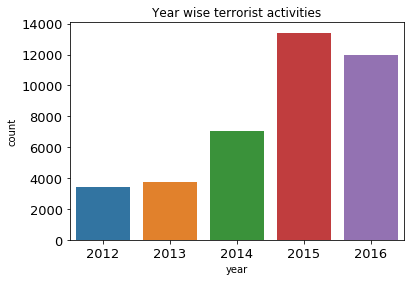

In [33]:
plt.title('Year wise terrorist activities')
sns.countplot(x=data.year)

Terrorist activities have increased since 2012, until decreased in 2016

In [34]:
clo=copy.deepcopy(data)
clo['month']=clo['month'].apply(lambda x:calendar.month_abbr[x])

Text(0.5,1,'Activities per year per month')

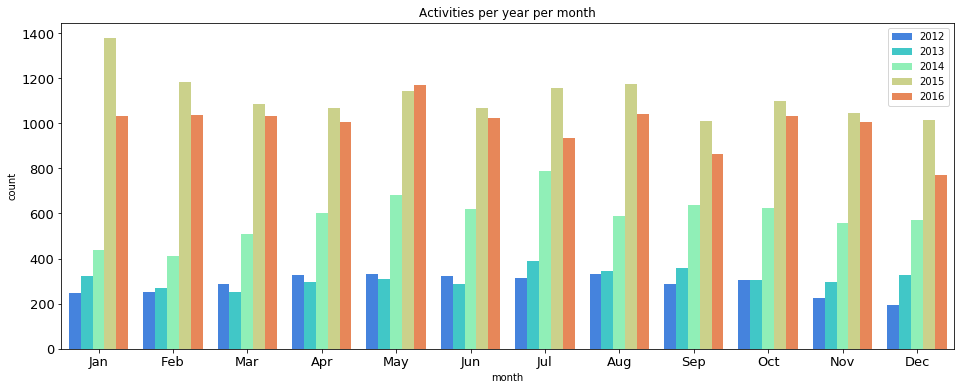

In [35]:
plt.figure(figsize=(16,6))
sns.countplot(x='month',hue='year',data=clo,palette='rainbow')
plt.legend(loc='best')
plt.title('Activities per year per month')

* Attacks have been least in december, maximum in May.
* Most attacks concentrated in the mid of the year

(-5, 400)

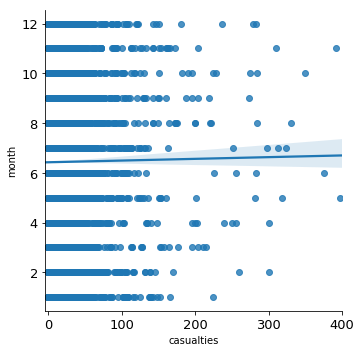

In [36]:
sns.lmplot(y='month',x='casualties',data=data)
plt.xlim(-5,400)

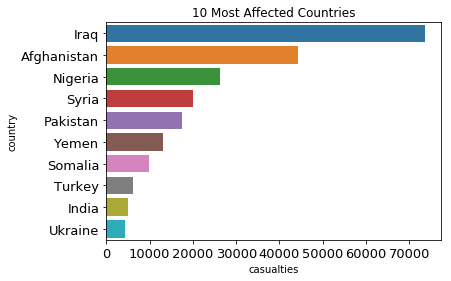

In [37]:
a,c=[],[]
for g,d in data.groupby('country'):
    if(d.casualties.sum()>0):
        a.append(g)
        c.append(d.casualties.sum())
plt.title('10 Most Affected Countries')
gc=pd.DataFrame(dict(casualties=c,country=a),columns=['casualties','country']).sort_values(ascending=False,by='casualties')[0:10]
sns.barplot(data=gc,y='country',x='casualties',ci=None)

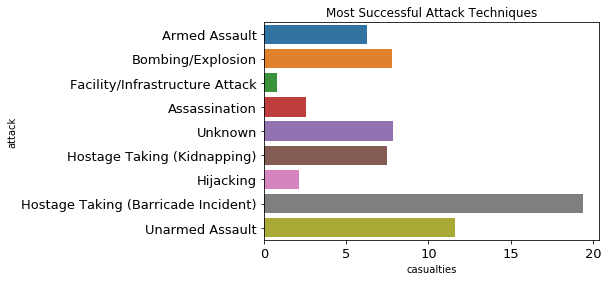

In [38]:
plt.title('Most Successful Attack Techniques')
sns.barplot(data=data,y='attack',x='casualties',ci=None)

* Hostage-taking in barricade incidents caused major casualties,followed by Unarmed assaults

In [39]:
x=data['group'].isin(data['group'].value_counts()[0:5].index) # bool series

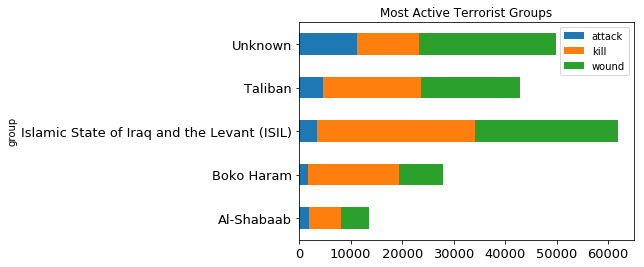

In [40]:
data[x][['group','kill','wound']].groupby('group').sum().merge(data[x]['group'].value_counts().reset_index()\
.rename(columns={'index':'group','group':'attack'}), on='group')\
.plot.barh(x='group',y=['attack','kill','wound'],stacked=True,title="Most Active Terrorist Groups")

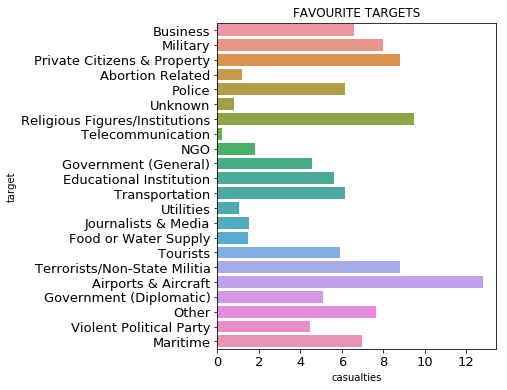

In [41]:
plt.figure(figsize=(5,6))
plt.title('FAVOURITE TARGETS')
sns.barplot(data=data,y='target',x='casualties',ci=None)

Airports and Aircraft affected most

In [42]:
#piechart
v1=data[data['group'].isin(data['group'].value_counts()[0:10].index)]
xattack=pd.crosstab(v1['group'],v1['casualties'],margins='All')

In [43]:
xattack

casualties                                    0.0   1.0   2.0   3.0   4.0  \
group                                                                       
Al-Qaida in the Arabian Peninsula (AQAP)      168   179    76    70    30   
Al-Shabaab                                    312   419   213   151   125   
Boko Haram                                    239   149   147   142   104   
Houthi extremists (Ansar Allah)               288    63    40    44    42   
Islamic State of Iraq and the Levant (ISIL)   447   272   198   179   210   
Kurdistan Workers' Party (PKK)                261   151   121    78    57   
Maoists                                       539   318   113    39    18   
New People's Army (NPA)                       435   248   123    58    41   
Taliban                                       526   501   479   459   432   
Unknown                                      3720  2106  1119   715   516   
All                                          6935  4406  2629  1935  1575   

casualties                                    5.0   6.0   7.0  8.0  9.0  \
group                                                                     
Al-Qaida in the Arabian Peninsula (AQAP)       43    24    27   33   14   
Al-Shabaab                                    107    72    48   42   32   
Boko Haram                                     76    61    56   40   52   
Houthi extremists (Ansar Allah)                18    26    24   11    7   
Islamic State of Iraq and the Levant (ISIL)   179   168   132   99  101   
Kurdistan Workers' Party (PKK)                 42    24    22   14   14   
Maoists                                        11    11     7    1    3   
New People's Army (NPA)                        45    20    14   15    6   
Taliban                                       353   249   204  148  130   
Unknown                                       443   456   475  484  435   
All                                          1317  1111  1009  887  794   

casualties                                   ...    418.0  444.0  500.0  \
group                                        ...                          
Al-Qaida in the Arabian Peninsula (AQAP)     ...        0      0      0   
Al-Shabaab                                   ...        0      0      0   
Boko Haram                                   ...        0      0      0   
Houthi extremists (Ansar Allah)              ...        0      0      0   
Islamic State of Iraq and the Levant (ISIL)  ...        0      1      1   
Kurdistan Workers' Party (PKK)               ...        0      0      0   
Maoists                                      ...        0      0      0   
New People's Army (NPA)                      ...        0      0      0   
Taliban                                      ...        1      0      0   
Unknown                                      ...        0      0      0   
All                                          ...        1      1      1   

casualties                                   520.0  536.0  583.0  670.0  \
group                                                                     
Al-Qaida in the Arabian Peninsula (AQAP)         0      0      0      0   
Al-Shabaab                                       0      0      0      0   
Boko Haram                                       0      0      0      0   
Houthi extremists (Ansar Allah)                  0      0      0      0   
Islamic State of Iraq and the Levant (ISIL)      1      0      1      1   
Kurdistan Workers' Party (PKK)                   0      0      0      0   
Maoists                                          0      0      0      0   
New People's Army (NPA)                          0      0      0      0   
Taliban                                          0      1      0      0   
Unknown                                          0      0      0      0   
All                                              1      1      1      1   

casualties                                   1501.0  1503.0    All  
g

In [44]:
xattack=xattack[0:-2] # dropping unkonwn group and ALL

Text(0.5,0.98,'Percentage of Casualties')

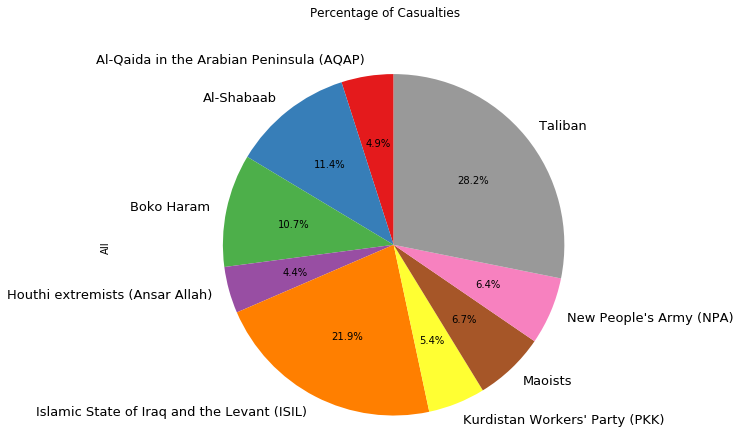

In [45]:
xattack.plot.pie(legend=False,y='All',startangle=90,figsize=(10,7),cmap='Set1',autopct='%1.1f%%') # auto percent
plt.axis('equal')
plt.suptitle('Percentage of Casualties')

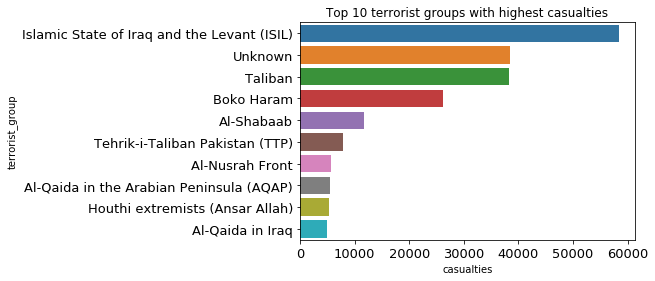

In [46]:
a,c=[],[]
for g,d in data.groupby('group'):
    if(d.casualties.sum()>0):
        a.append(g)
        c.append(d.casualties.sum())
plt.title('Top 10 terrorist groups with highest casualties')
gc=pd.DataFrame(dict(casualties=c,terrorist_group=a),columns=['casualties','terrorist_group'])\
.sort_values(ascending=False,by='casualties')[0:10]
sns.barplot(data=gc,y='terrorist_group',x='casualties',ci=None)

Most Successful Terrorist Groups -Isil, Taliban

In [47]:
print('Number Of Terrorist Groups: ',len(a))

Number Of Terrorist Groups:  556


In January 2015, Around 1400 Attcks Were Made

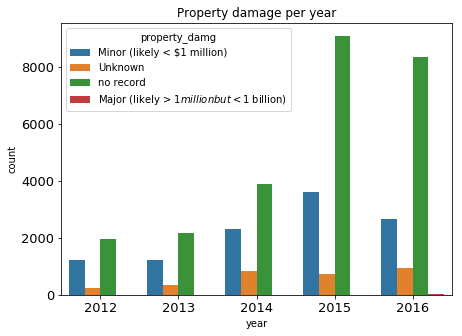

In [48]:
plt.figure(figsize=(7,5))
plt.title('Property damage per year')
sns.countplot(x='year',hue='property_damg',data=data)

2015 saw a huge property loss.

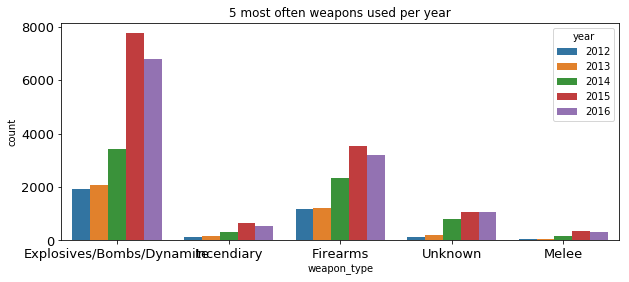

In [49]:
plt.figure(figsize=(10,4))
plt.title('5 most often weapons used per year')
x=data[(data.weapon_type=='Explosives/Bombs/Dynamite')|(data.weapon_type=='Incendiary')\
       |(data.weapon_type=='Unknown')|(data.weapon_type=='Melee')|(data.weapon_type=='Firearms')]
sns.countplot(x='weapon_type',data=x,hue='year')

Explosives/Bombs/Dynamites Have Been Extensively Used in 2016, 2015 and 2014

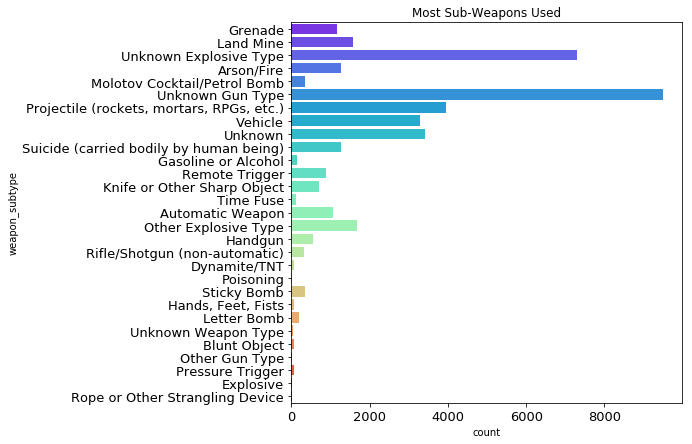

In [50]:
plt.figure(figsize=(7,7))
plt.title('Most Sub-Weapons Used')
sns.countplot(y='weapon_subtype',data=data,palette='rainbow')

* Unknown gun type, explosion type used most
* Projectiles and vehicles too have been used

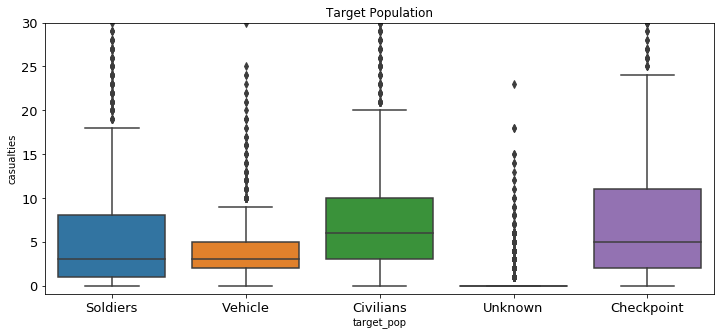

In [51]:
plt.figure(figsize=(12,5))
n1=data[data['target_pop'].isin(data['target_pop'].value_counts()[0:5].index)][['target_pop','casualties']]
plt.ylim(-1,30)
plt.title('Target Population')
sns.boxplot(x='target_pop',y='casualties',data=n1)

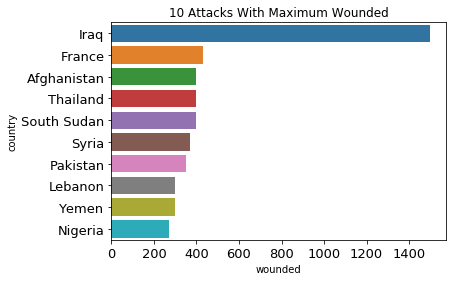

In [52]:
w,con=[],[]
plt.title('10 Attacks With Maximum Wounded')
for g,d in data.groupby('country'):
    if(d.wound.max()>0):
        w.append(d.wound.max())
        con.append(g)
ck=pd.DataFrame(dict(wounded=w,country=con),columns=['wounded','country']).sort_values(by='wounded',ascending=False)[0:10]
sns.barplot(data=ck,x='wounded',y='country',ci=None)

### 4.2 Trend in activity of top 10 Terrorist Group

In [53]:
#Crosstab
x=data[data['group'].isin(data['group'].value_counts()[0:10].index)]
xtab = pd.crosstab(x['year'],x['group']) #rows,columns
xtab

group  Al-Qaida in the Arabian Peninsula (AQAP)  Al-Shabaab  Boko Haram  \
year                                                                      
2012                                        192         205         384   
2013                                        137         256         214   
2014                                        270         608         429   
2015                                        121         318         471   
2016                                         75         456         223   

group  Houthi extremists (Ansar Allah)  \
year                                     
2012                                 0   
2013                                16   
2014                               104   
2015                               292   
2016                               297   

group  Islamic State of Iraq and the Levant (ISIL)  \
year                                                 
2012                                             0   
2013                                           344   
2014                                           976   
2015                                          1052   
2016                                          1148   

group  Kurdistan Workers' Party (PKK)  Maoists  New People's Army (NPA)  \
year                                                                      
2012                              121      162                       83   
2013                               18      157                      197   
2014                               55      243                      270   
2015                              324      257                      314   
2016                              352      259                      165   

group  Taliban  Unknown  
year                     
2012       785        0  
2013       735        0  
2014       978        0  
2015      1071     5947  
2016       964     5359

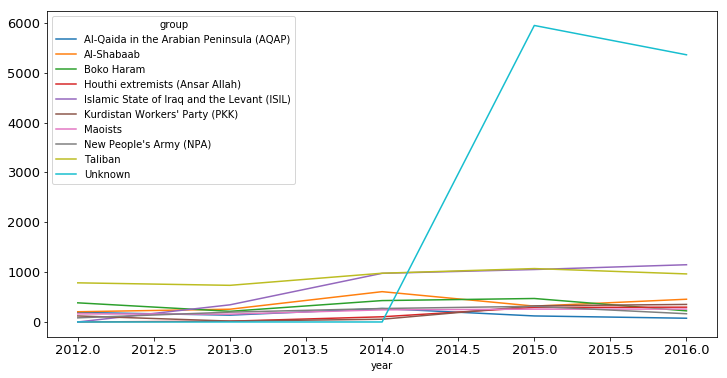

In [54]:
xtab.plot(figsize=(12,6))

* Al-Qaida in the Arabian Peninsula (AQAP) is most active in India since 2014
* From 2012 to 2014 Taliban was the most active terrorist group.
* ISIL came into existence after 2013

### <a id='Terrorism in India'>5. Terrorism in India </a>

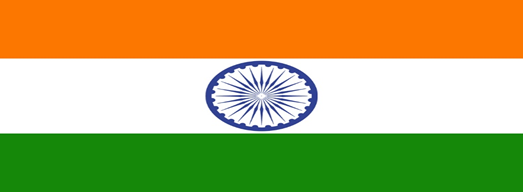

In [55]:
India = data[data['country']=='India']

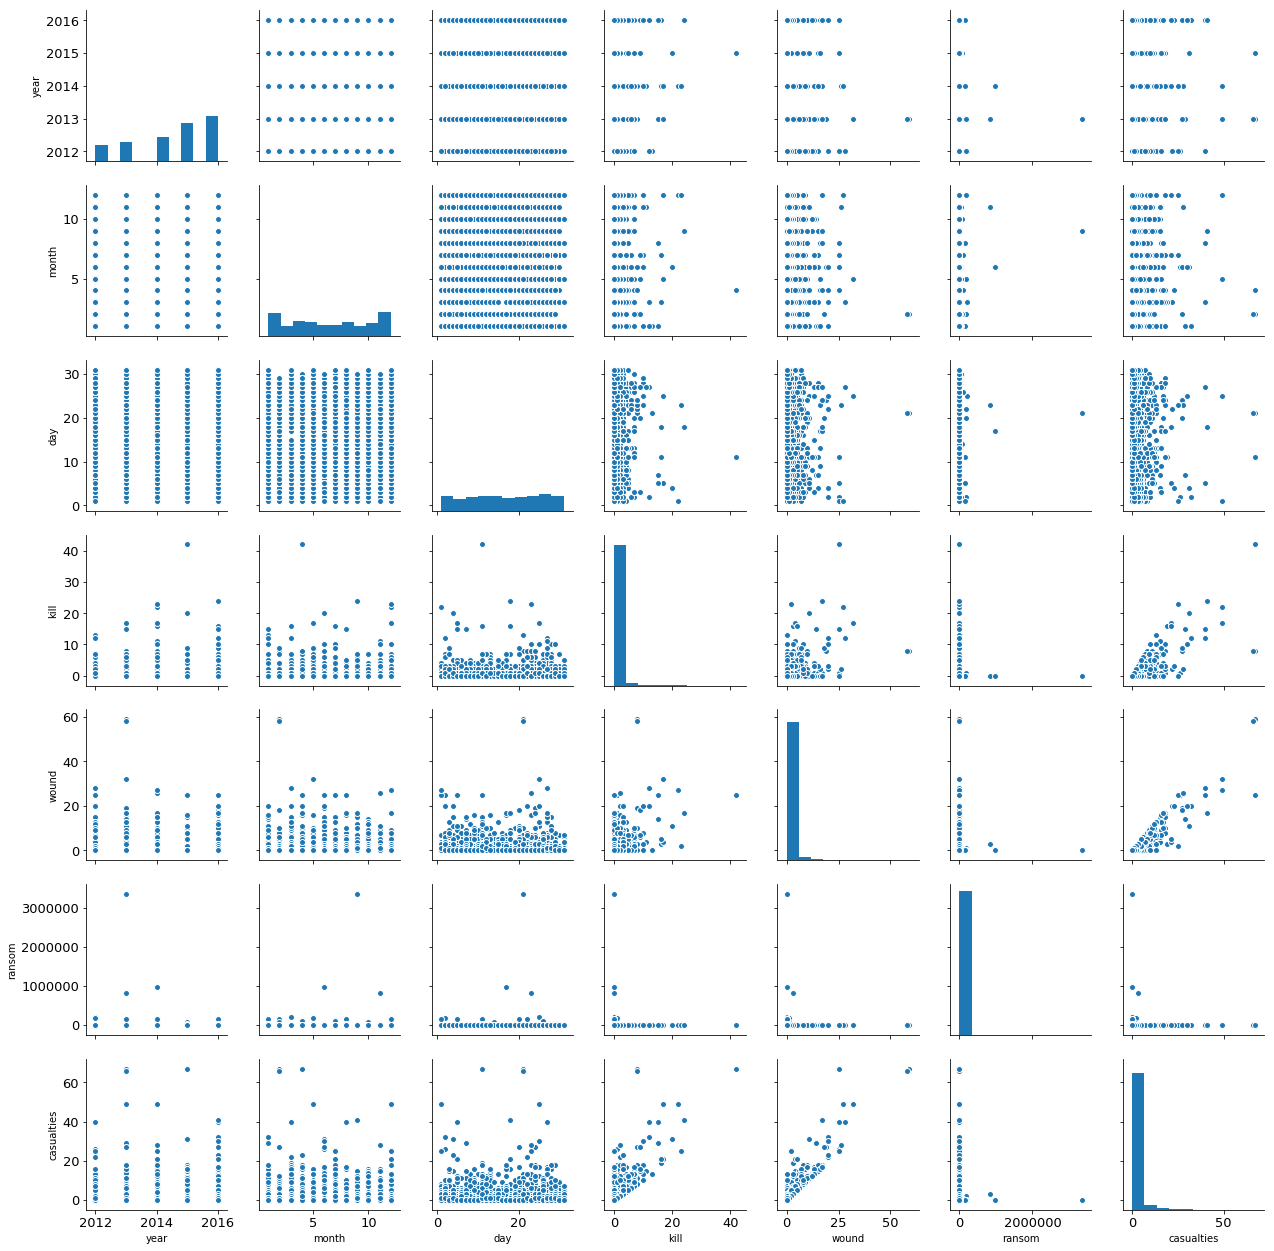

In [56]:
sns.pairplot(India)

# <a id='#History of Terrorism in India'>5.1 History of Terrorism in India </a>

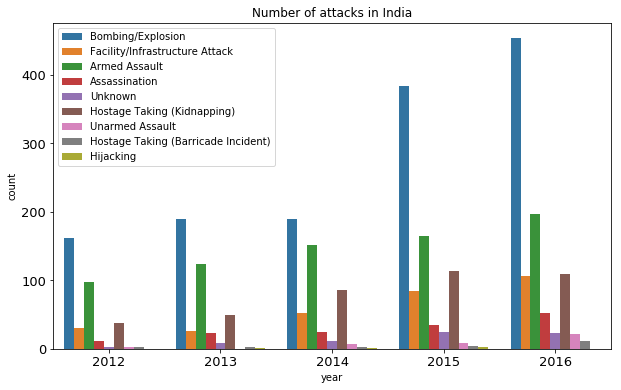

In [57]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='year',hue='attack',data=India)
ax.set_title('Number of attacks in India')
ax.legend(loc=2)

* **Terrorism in India show somewhat same trend as seen globally i.e, bombing/Explosion topped in Attack type followed by Armed Assault in each year**
* **2016 was the worst year for India as the attack frequency was highest**

### <a id='#Most Active Terrorist group in India'>5.2 Most Active Terrorist group in India </a>

In [58]:
max_killed = India['kill'].max()
idx = India.loc[India.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,'in',India.at[idx,'city'],India.at[idx,'country'],\
     'through',India.at[idx,'attack'],'by',India.at[idx,'group'],'using',India.at[idx,'weapon_type'],\
     '.Majority of them were',India.at[idx,'target'])

Maximum people killed in an attack are 42.0 in Sukma district India through Armed Assault by Communist Party of India - Maoist (CPI-Maoist) using Firearms .Majority of them were Police


In [59]:
print("Number of Terrorist groups in India is",len(India['group'].unique()),'!')

Number of Terrorist groups in India is 119 !


In [60]:
x=India['group'].isin(India['group'].value_counts()[0:10].index)

In [61]:
# 10 Most active Terrorist groups with their casualties
grp_cas = India[x][['group','casualties']].groupby('group').sum().reset_index()
grp_cas

group  casualties
0     Communist Party of India - Maoist (CPI-Maoist)       649.0
1                      Garo National Liberation Army       128.0
2                             Hizbul Mujahideen (HM)       282.0
3                              Lashkar-e-Taiba (LeT)       481.0
4                                            Maoists      1215.0
5       National Democratic Front of Bodoland (NDFB)       248.0
6  National Socialist Council of Nagaland-Isak-Mu...        75.0
7                   People's Liberation Army (India)       114.0
8            United Liberation Front of Assam (ULFA)       237.0
9                                            Unknown       591.0

In [62]:
# 10 Most active Terrorist groups
grp_cnt=India[x]['group'].value_counts().reset_index().rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

group  count_of_attack
0                                            Maoists             1076
1                                            Unknown              707
2     Communist Party of India - Maoist (CPI-Maoist)              317
3                      Garo National Liberation Army              121
4            United Liberation Front of Assam (ULFA)               93
5       National Democratic Front of Bodoland (NDFB)               77
6                             Hizbul Mujahideen (HM)               71
7                   People's Liberation Army (India)               60
8                              Lashkar-e-Taiba (LeT)               56
9  National Socialist Council of Nagaland-Isak-Mu...               41

In [63]:
# Merging the two 
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

group  casualties  \
4                                            Maoists      1215.0   
0     Communist Party of India - Maoist (CPI-Maoist)       649.0   
9                                            Unknown       591.0   
3                              Lashkar-e-Taiba (LeT)       481.0   
2                             Hizbul Mujahideen (HM)       282.0   
5       National Democratic Front of Bodoland (NDFB)       248.0   
8            United Liberation Front of Assam (ULFA)       237.0   
1                      Garo National Liberation Army       128.0   
7                   People's Liberation Army (India)       114.0   
6  National Socialist Council of Nagaland-Isak-Mu...        75.0   

   count_of_attack  
4             1076  
0              317  
9              707  
3               56  
2               71  
5               77  
8               93  
1              121  
7               60  
6               41

Text(0,0.5,'Terrorist Group')

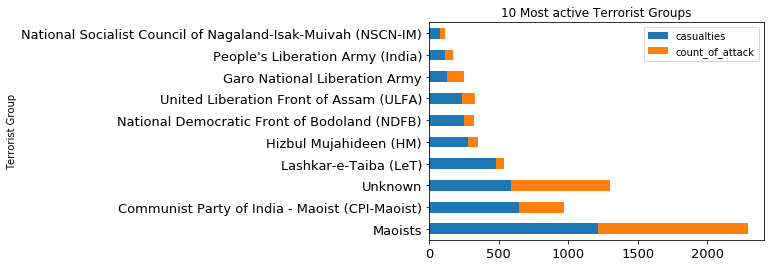

In [64]:
ax = grp.plot.barh(x='group',y=['casualties','count_of_attack'],stacked=True,title='10 Most active Terrorist Groups')
plt.ylabel('Terrorist Group')

* Maoists is the most active group in India
* LeT has caused greater casualities in less attacks
* Here Unknown refers mostly to the terrorists which cross border from Pakistan to Jammu and Kashmir and enter India, but no terrorist groups in Pakistan take responsibility of that to avoid suspicion. Next graph will clear it more

### <a id='#Most Affected City in India'>5.3 Most Affected City in India </a>

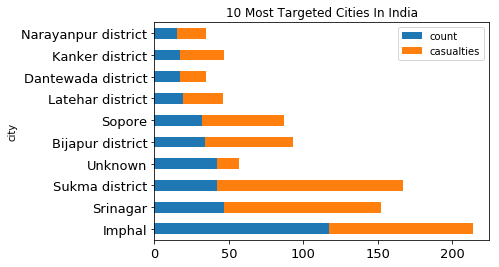

In [65]:
x=India['city'].isin(India['city'].value_counts()[0:10].index)
city_cnt=India[x]['city'].value_counts().reset_index().rename(columns={'index':'city','city':'count'})\
.merge(India[x].groupby('city').sum()['casualties'].reset_index(),on='city')
city_cnt.plot.barh(x='city',y=['count','casualties'],title='10 Most Targeted Cities In India',stacked=True)

* Imphal is the most targeted city followed by Srinagar
* Sukma district saw the most casualties

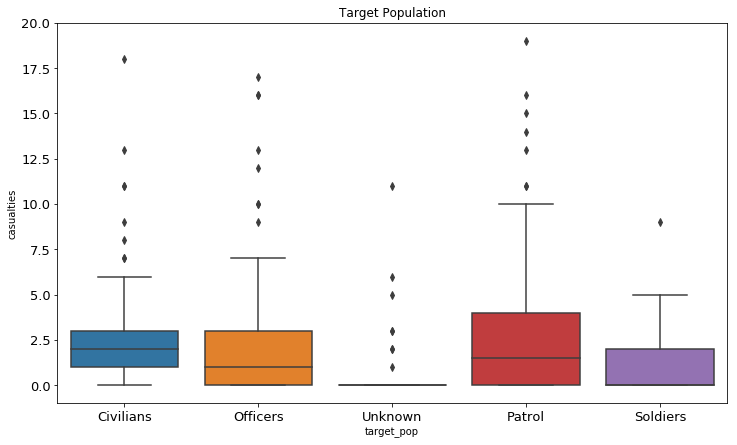

In [66]:
plt.figure(figsize=(12,7))
n1=India[India['target_pop'].isin(India['target_pop'].value_counts()[0:5].index)][['target_pop','casualties']]
plt.ylim(-1,20)
plt.title('Target Population')
sns.boxplot(x='target_pop',y='casualties',data=n1)

### <a id='#Favourite Target of top 10 Terrorist Group in India'>5.4 Favourite Target of top 10 Terrorist Group in India </a>

Text(0,0.5,'Count')

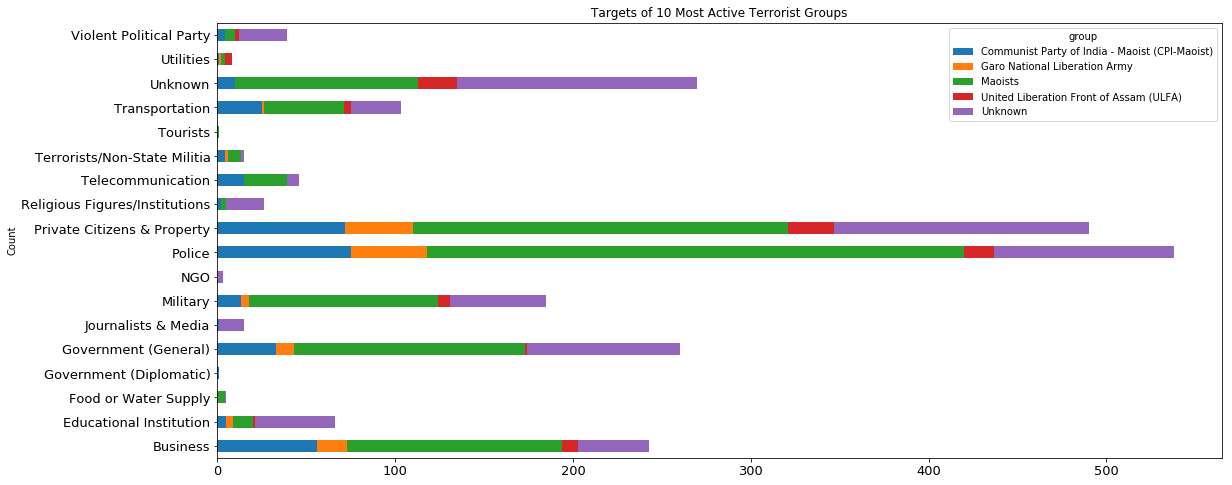

In [67]:
v1=India[India['group'].isin(India['group'].value_counts()[0:5].index)]
pd.crosstab(v1['target'],v1['group']).plot.barh(stacked=True,figsize=(18,8),title='Targets of 10 Most Active Terrorist Groups')
plt.ylabel('Count')

* **Maoists mostly target Police, Private Citizens and Property, Business**
* **Private Citizen and Property and Polic are mostly damaged by these groups**

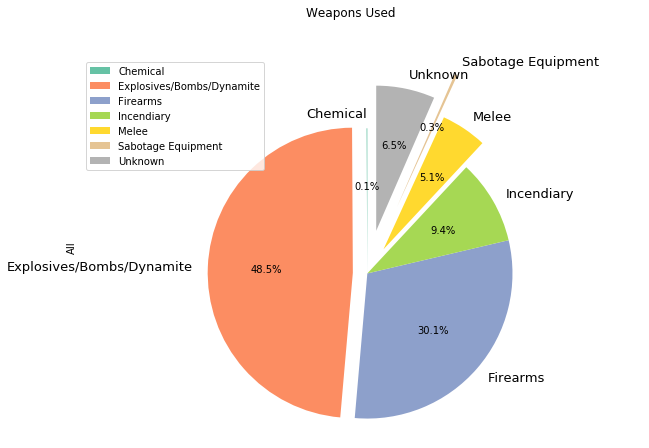

In [68]:
explode=(0.0, 0.1, 0.0, 0.0, 0.2, 0.5, 0.3) #anti clockwise
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-2]
xattack.plot.pie(y='All',startangle=90,figsize=(10,7),cmap='Set2',autopct='%1.1f%%',explode=explode) # auto percent
plt.axis('equal')
plt.suptitle('Weapons Used')
plt.legend(loc=0)

### <a id='Terrorism in Pakistan'>6. Terrorism in Pakistan </a>

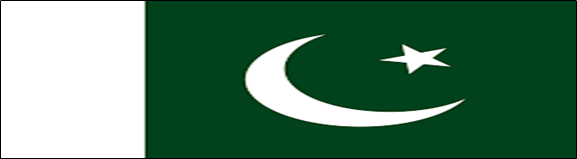

In [69]:
pak=data[data.country=='Pakistan']

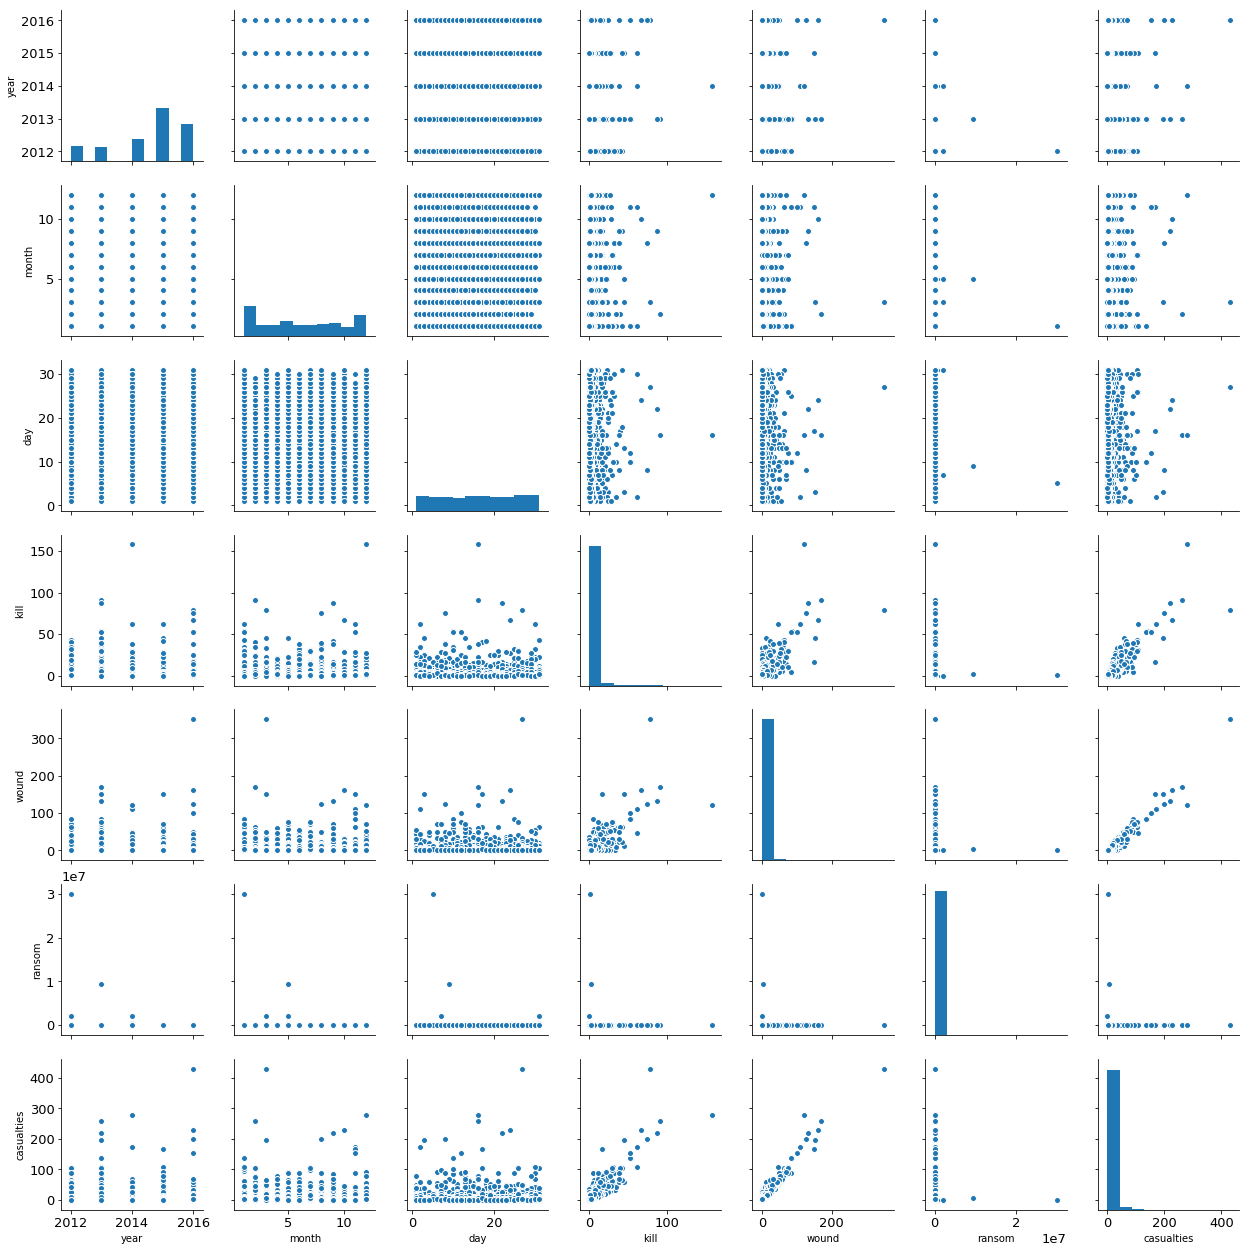

In [70]:
sns.pairplot(pak)

In [71]:
pak.describe()

year        month          day         kill        wound  \
count  3152.000000  3152.000000  3152.000000  3152.000000  3152.000000   
mean   2014.581853     6.130711    15.694797     2.195431     3.355964   
std       1.269079     3.458699     8.830906     6.437987    12.437832   
min    2012.000000     1.000000     1.000000     0.000000     0.000000   
25%    2014.000000     3.000000     8.000000     0.000000     0.000000   
50%    2015.000000     6.000000    16.000000     1.000000     0.000000   
75%    2016.000000     9.000000    23.000000     2.000000     2.000000   
max    2016.000000    12.000000    31.000000   158.000000   351.000000   

             ransom   casualties  
count  3.152000e+03  3152.000000  
mean   1.404150e+04     5.551396  
std    5.626958e+05    17.720293  
min   -9.900000e+01     0.000000  
25%    0.000000e+00     0.000000  
50%    0.000000e+00     1.000000  
75%    0.000000e+00     4.000000  
max    3.000000e+07   430.000000

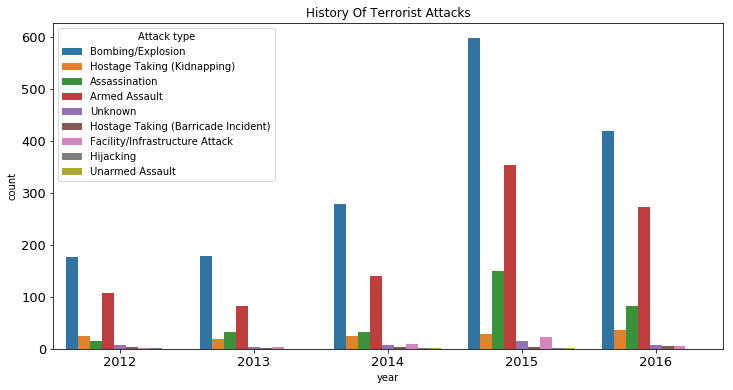

In [72]:
plt.figure(figsize=(12,6))
sns.countplot(x=pak.year,hue = 'attack', data = pak)
plt.title("History Of Terrorist Attacks")
plt.legend(title='Attack type')

* Shows more than two fold rise in attacks in 2015, with a decrease in 2016 
* Terrorism in Pakistan show somewhat same trend as seen globally i.e, bombing/Explosion topped in Attack type followed by Armed Assault each year

In [73]:
max_killed = pak['kill'].max()
idx = pak.loc[pak.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,'in',pak.at[idx,'city'],pak.at[idx,'country'],\
     'through',pak.at[idx,'attack'],'by',pak.at[idx,'group'],'using',pak.at[idx,'weapon_type'],\
     '.Majority of them were',pak.at[idx,'target'])

Maximum people killed in an attack are 158.0 in Peshawar Pakistan through Hostage Taking (Barricade Incident) by Tehrik-i-Taliban Pakistan (TTP) using Explosives/Bombs/Dynamite .Majority of them were Educational Institution


** 10 Most Active Terrorist Groups with casualties**

In [74]:
grp_cas = pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)][['group','casualties']].groupby('group')\
.sum().reset_index()
grp_cas.sort_values(by='casualties',ascending=False)

group  casualties
7        Tehrik-i-Taliban Pakistan (TTP)      7792.0
9                                Unknown      2092.0
5                      Lashkar-e-Jhangvi      1866.0
8               United Baloch Army (UBA)       673.0
4             Lashkar-e-Islam (Pakistan)       574.0
2           Baloch Republican Army (BRA)       573.0
3  Khorasan Chapter of the Islamic State       536.0
0           Baloch Liberation Army (BLA)       435.0
1          Baloch Liberation Front (BLF)       391.0
6     Sindhu Desh Liberation Army (SDLA)        71.0

** Top 10 Terrorist Groups with attack count**

In [75]:
grp_cnt=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]['group'].value_counts().reset_index()\
.rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

group  count_of_attack
0                                Unknown             1368
1        Tehrik-i-Taliban Pakistan (TTP)              679
2           Baloch Republican Army (BRA)              233
3          Baloch Liberation Front (BLF)              144
4           Baloch Liberation Army (BLA)               97
5                      Lashkar-e-Jhangvi               87
6               United Baloch Army (UBA)               78
7             Lashkar-e-Islam (Pakistan)               77
8     Sindhu Desh Liberation Army (SDLA)               49
9  Khorasan Chapter of the Islamic State               48

In [76]:
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

group  casualties  count_of_attack
7        Tehrik-i-Taliban Pakistan (TTP)      7792.0              679
9                                Unknown      2092.0             1368
5                      Lashkar-e-Jhangvi      1866.0               87
8               United Baloch Army (UBA)       673.0               78
4             Lashkar-e-Islam (Pakistan)       574.0               77
2           Baloch Republican Army (BRA)       573.0              233
3  Khorasan Chapter of the Islamic State       536.0               48
0           Baloch Liberation Army (BLA)       435.0               97
1          Baloch Liberation Front (BLF)       391.0              144
6     Sindhu Desh Liberation Army (SDLA)        71.0               49

* Tehrik-i-Taliban Pakistan (TTP) tops the list in terms of casualities 
* Lashkar-e-Jhangvi,United Baloch Army (UBA),Lashkar-e-Islam (Pakistan), Baloch Liberation Army (BLA) and Khorasan Chapter of the Islamic State caused alot of casualities in much less number of attacks

Text(0.5,0,'count')

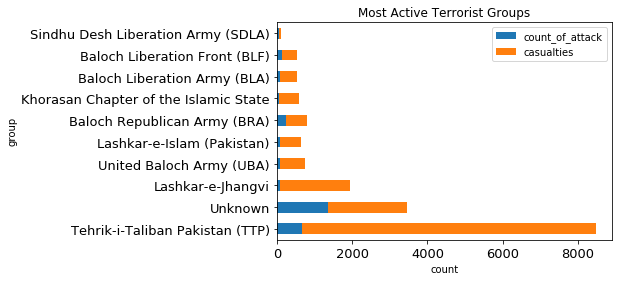

In [77]:
ax = grp.plot.barh(x='group',y=['count_of_attack','casualties'],stacked=True,title="Most Active Terrorist Groups")
ax.set_xlabel('count')

* Tehrik-i-Taliban Pakistan (TTP) and other groups caused great human loss in less attacks. It proves they have been very successful in their attempts.

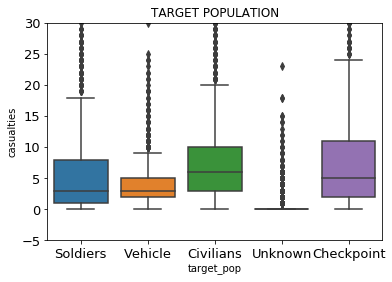

In [78]:
n1=data[data['target_pop'].isin(data['target_pop'].value_counts()[0:5].index)][['target_pop','casualties']]
plt.ylim(-5,30)
plt.title('TARGET POPULATION')
sns.boxplot(x='target_pop',y='casualties',data=n1)

Text(0,0.5,'count')

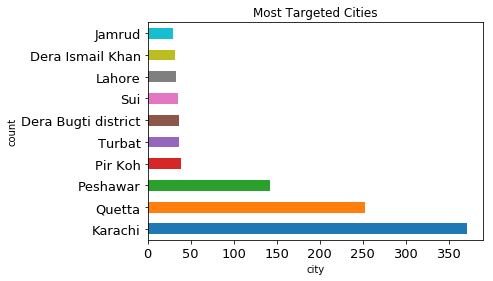

In [79]:
pak[pak['city'].isin(pak['city'].value_counts()[0:10].index)]['city'].value_counts().plot.barh(title="Most Targeted Cities")
plt.xlabel('city')
plt.ylabel('count')

Karachi is the most targeted city.It might be because it is the most populous city,home to two largest seaports and home to the most busiest airport of the Pakistan,Jinnah International Airport. It is also the premier industrial and financial centre and most cosmopolitan city of the country. It was also the first capital of the country.

Text(0.5,0,'count')

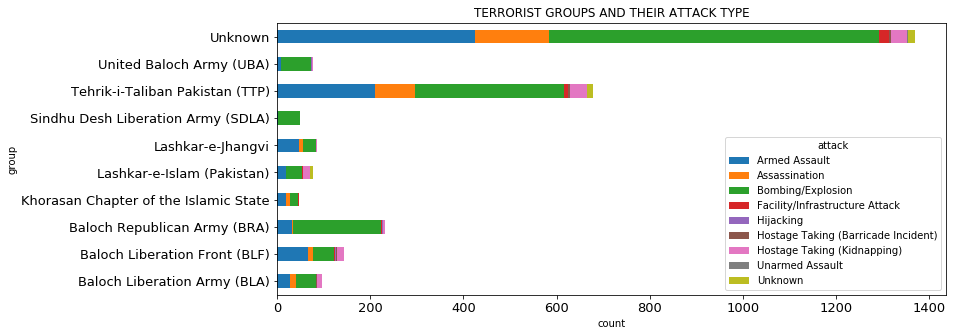

In [80]:
p1=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]
pd.crosstab(p1['group'],p1['attack']).plot.barh(stacked=True,figsize=(12,5),title="TERRORIST GROUPS AND THEIR ATTACK TYPE")
plt.xlabel('count')

* Bombing/explosion and armed assault has been extensively used by groups

Text(0.5,0,'count')

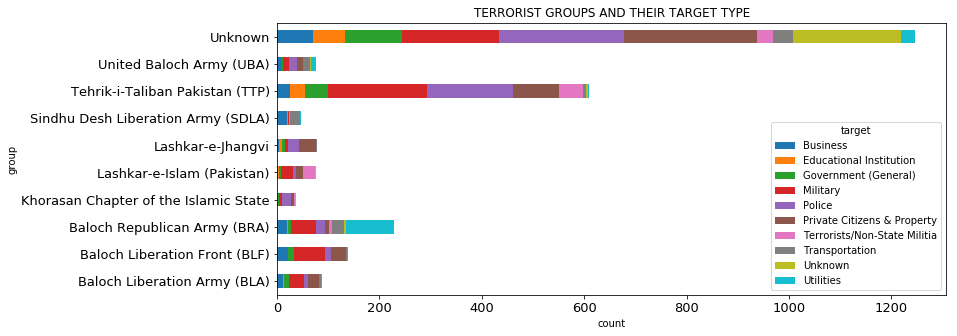

In [81]:
p1=p1[p1['target'].isin(p1['target'].value_counts()[0:10].index)]
pd.crosstab(p1['group'],p1['target']).plot.barh(stacked=True,figsize=(12,5),title='TERRORIST GROUPS AND THEIR TARGET TYPE')
plt.xlabel('count')

* Tehrik-i-Taliban Pakistan (TTP) seem to target the defence force of the country most. 
* Military system,private citizens and property are attacked almost by all groups.

Text(0,0.5,'count')

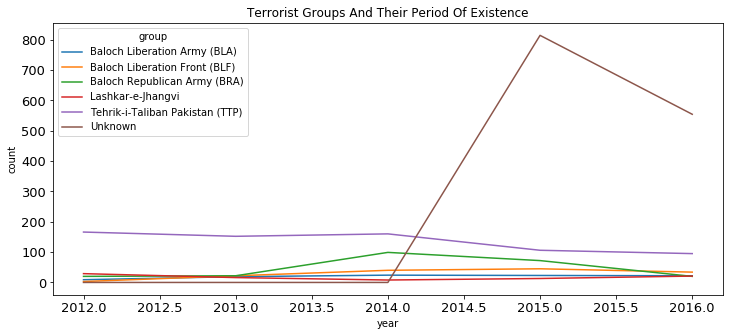

In [82]:
x=pak[pak['group'].isin(pak['group'].value_counts()[0:6].index)]
pd.crosstab(x['year'],x['group']).plot(figsize=(12,5),title='Terrorist Groups And Their Period Of Existence')
plt.ylabel('count')

* The TTP has been the most active group since 2012 until 2014 where it showed a decrease 
* The Unknown groups show sharp rise in their attacks in 2015.

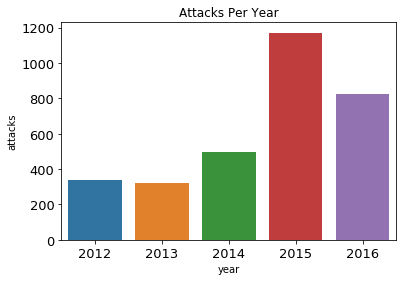

In [83]:
plt.title('Attacks Per Year')
p1=pak['year'].value_counts().reset_index().rename(columns={'index':'year','year':'attacks'}).sort_values(by='year')
sns.barplot(data=p1,x='year',y='attacks',ci=None)

2015 was the worst year for the country with attacks more than double in past three years

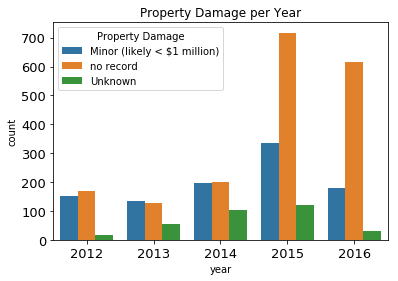

In [84]:
plt.title('Property Damage per Year')
sns.countplot(x='year',hue='property_damg',data=pak)
plt.legend(title="Property Damage")

In [85]:
v1=pak[pak['group'].isin(pak['group'].value_counts()[0:10].index)]
v1.weapon_type.nunique()

6

Text(0.5,0.98,'Weapons Used')

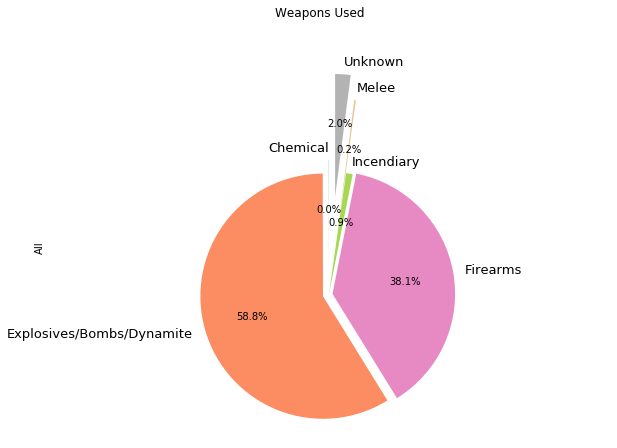

In [86]:
explode=(0.1, 0.05, 0.03, 0.0, 0.6,0.8) #anti clockwise
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-1]
xattack.plot.pie(legend=False,y='All',startangle=90,figsize=(10,7),cmap='Set2',autopct='%1.1f%%',explode=explode) # auto percent
plt.axis('equal')
plt.suptitle('Weapons Used')

More than 50% of the attacks used Explosives/Bombs/Dynamites.

In [87]:
p1=pak[pak.nationality=='Pakistan'].groupby('group')
print('Number of terrorist groups from Pakistan itself :',len(list(p1)))

Number of terrorist groups from Pakistan itself : 58


### <a id='Terrorism in Nepal'>7. Terrorism in Nepal </a>

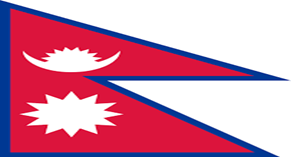

In [88]:
Nepal=data[data['country']=='Nepal']

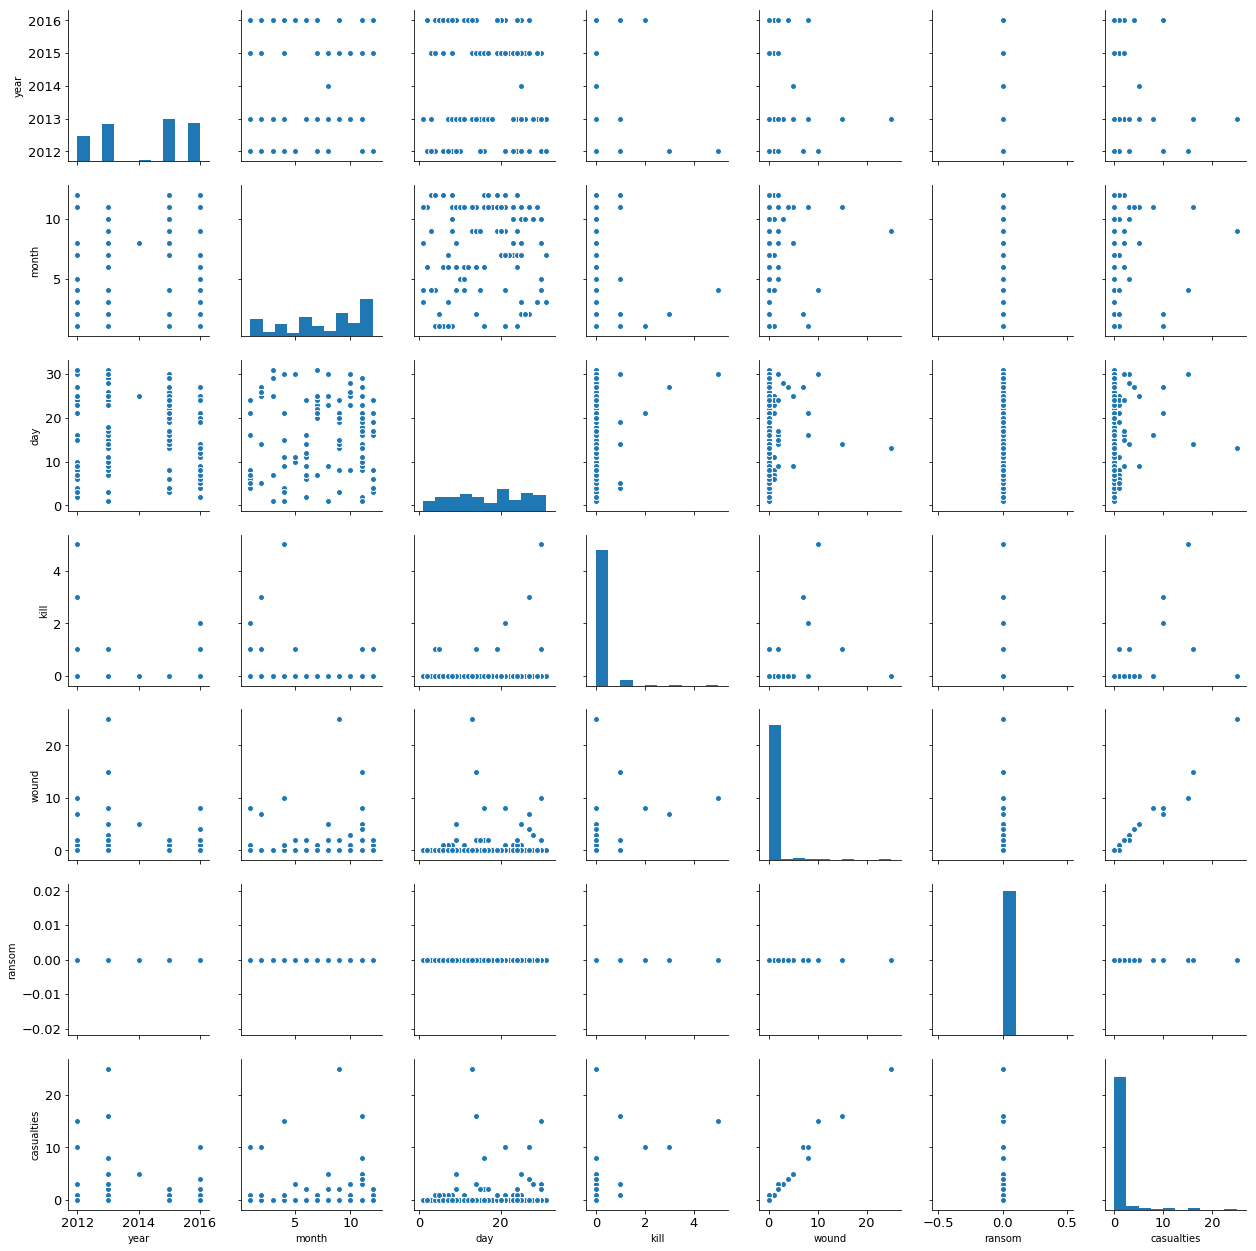

In [89]:
sns.pairplot(Nepal)

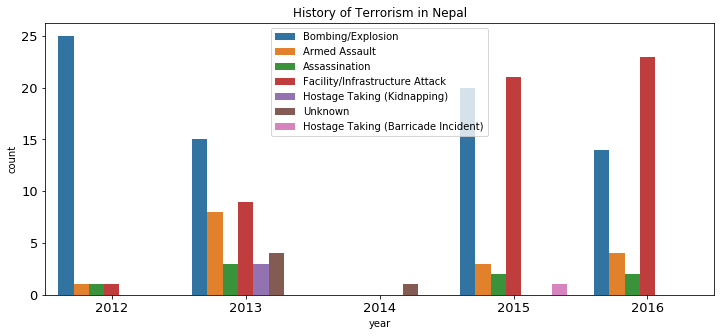

In [90]:
plt.figure(figsize=(12,5))
sns.countplot(x = 'year', hue = 'attack', data = Nepal)
plt.title('History of Terrorism in Nepal')
plt.legend(loc=9)

* **In 2012 mostly all the attacks were done by bombing or explosive**
* **In 2013 we can see there was a change in thier plan and they attacked in different ways**  
* **In 2014 there were less attacks compared to other years**
* **In 2015 again they started attacking and we can say they attacked with higher frequency compared to previous years. They started hostaging people**
* **In 2016 bombing and assassination were more **

### Most Affected City In Nepal

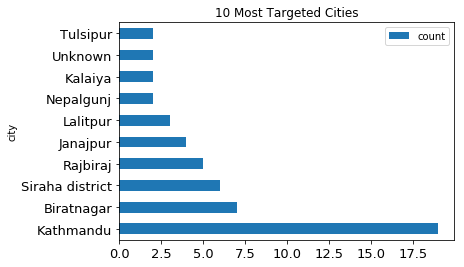

In [91]:
city_cnt=Nepal[Nepal['city'].isin(Nepal['city'].value_counts()[0:10].index)]['city'].value_counts().reset_index()\
.rename(columns={'index':'city','city':'count'})
city_cnt.plot.barh(x='city',title='10 Most Targeted Cities')

**Katmandu is the most targeted city**

### Favourite Target of top 5 Terrorist Group in Nepal

In [92]:
Nepal.head(3)

year  month  day country       city             attack    target  \
57  2012      1    6   Nepal   Kohalpur  Bombing/Explosion   Unknown   
64  2012      1    6   Nepal  Kathmandu  Bombing/Explosion   Unknown   
77  2012      1    8   Nepal       Bara  Bombing/Explosion  Military   

      target_inst               target_pop nationality  \
57        Unknown                  Unknown       Nepal   
64        Unknown                  Unknown       Nepal   
77  Nepalese Army  Durga Bhanjan Battalion       Nepal   

                                             group                weapon_type  \
57  Janatantrik Terai Madhesh Mukti Morcha (JTMMM)  Explosives/Bombs/Dynamite   
64                              Nepal Defense Army  Explosives/Bombs/Dynamite   
77           Janatantrik Terai Mukti Morcha (JTMM)  Explosives/Bombs/Dynamite   

          weapon_subtype                                         weapdetail  \
57             Time Fuse  A timed explosive device and two socket bombs ...   
64  Other Explosive Type     A pressure-cooker bomb was used in the attack.   
77  Other Explosive Type  A roadside bomb containing shrapnel was used i...   

    kill  wound property_damg  ransom  casualties  
57   0.0    0.0     no record     0.0         0.0  
64   0.0    0.0     no record     0.0         0.0  
77   0.0    1.0     no record     0.0         1.0

(0, 50)

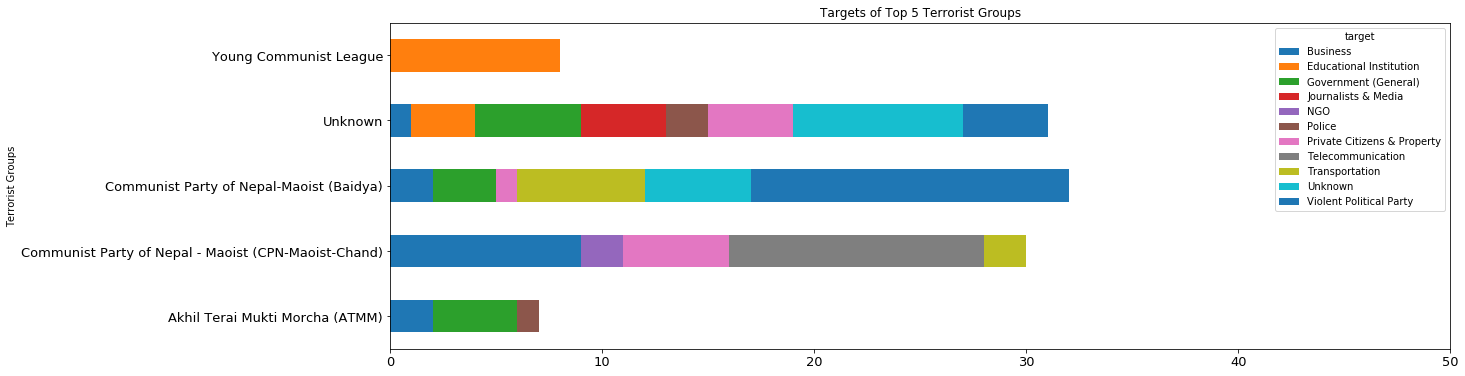

In [93]:
v1=Nepal[Nepal['group'].isin(Nepal['group'].value_counts()[0:5].index)]
pd.crosstab(v1['group'],v1['target']).plot.barh(stacked=True,figsize=(19,6),title='Targets of Top 5 Terrorist Groups')
plt.ylabel('Terrorist Groups')
plt.xlim(0,50)

Communist Party of Nepal-Maoist (Baidya) is the most active group, mostly attacking NGOs

In [94]:
v1=Nepal[Nepal['group'].isin(Nepal['group'].value_counts()[0:10].index)]
v1.weapon_type.nunique()

4

Text(0.5,0.98,'Weapons Used')

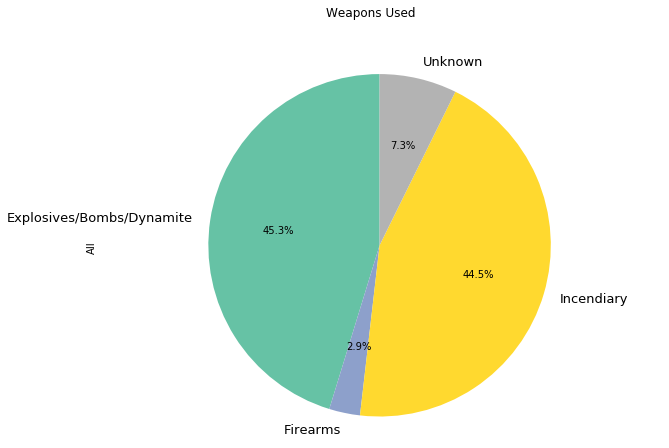

In [95]:
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-1]
xattack.plot.pie(legend=False,y='All',startangle=90,figsize=(10,7),cmap='Set2',autopct='%1.1f%%') # auto percent
plt.axis('equal')
plt.suptitle('Weapons Used')

### <a id='Terrorism in Afghanistan'>8. Terrorism in Afghanistan </a>

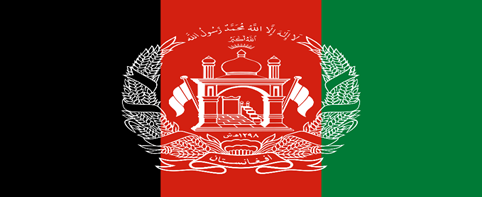

In [96]:
Afghanistan=data[data['country']=='Afghanistan']

In [97]:
print("Terrorist groups in Iraq is",len(Afghanistan['group'].unique()),'!')

Terrorist groups in Iraq is 15 !


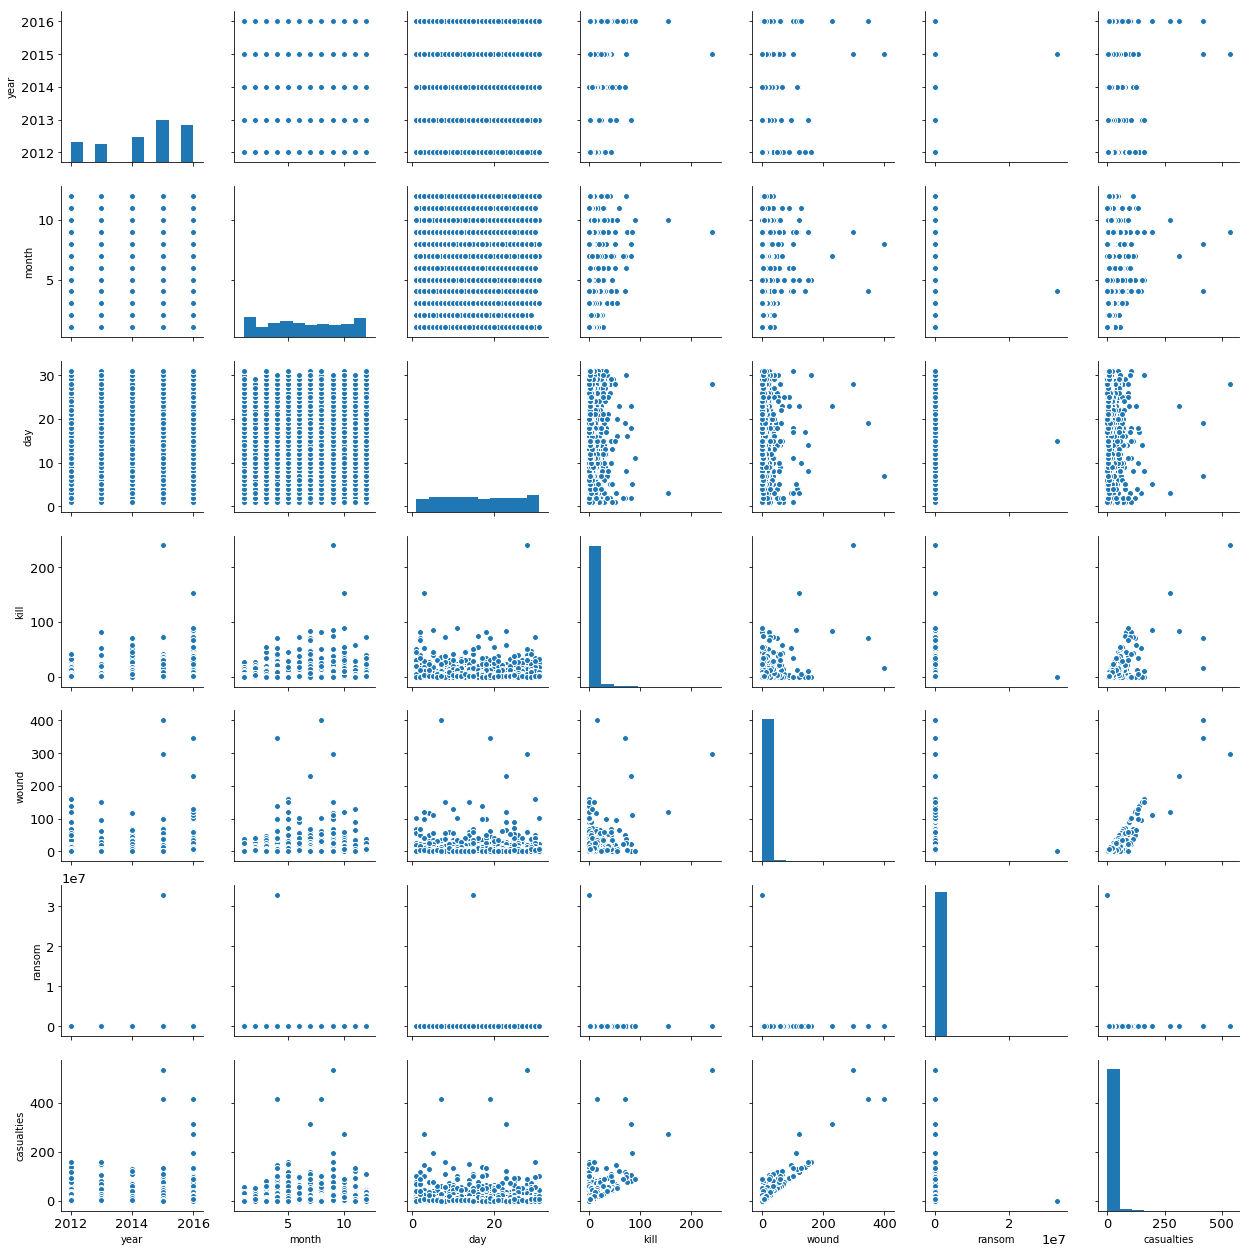

In [98]:
sns.pairplot(Afghanistan)

Text(0.5,1,'History of Terrorism in Afghanistan')

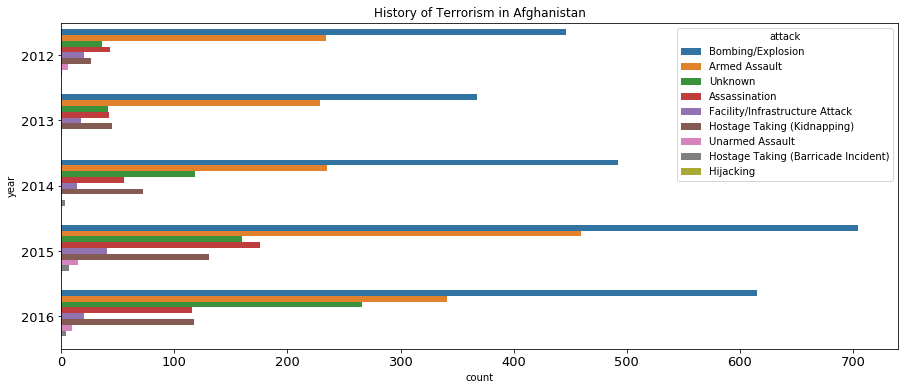

In [99]:
plt.figure(figsize=(15,6))
sns.countplot(y='year',hue='attack',data = Afghanistan)
plt.title('History of Terrorism in Afghanistan')

* **Every year mostly Bombing or exploson was used.**
* **In 2015 and 2016 they had used 8 differeny ways of terror.**

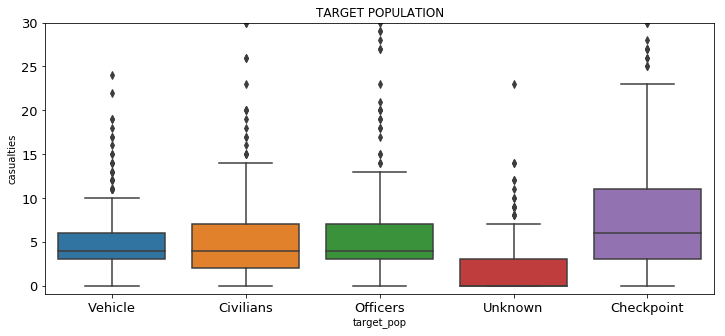

In [100]:
plt.figure(figsize=(12,5))
n1=Afghanistan[Afghanistan['target_pop'].isin(Afghanistan['target_pop'].value_counts()[0:5].index)][['target_pop','casualties']]
plt.ylim(-1,30)
plt.title('TARGET POPULATION')
sns.boxplot(x='target_pop',y='casualties',data=n1)

# Most Affected City In Afghanistan

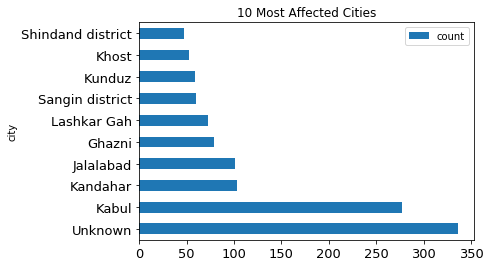

In [101]:
Afghanistan[Afghanistan['city'].isin(Afghanistan['city'].value_counts()[0:10].index)]['city'].value_counts().reset_index()\
.rename(columns={'index':'city','city':'count'}).plot.barh(x='city',title='10 Most Affected Cities')

### Favourite Target of top 10 Terrorist Group in Afghanistan

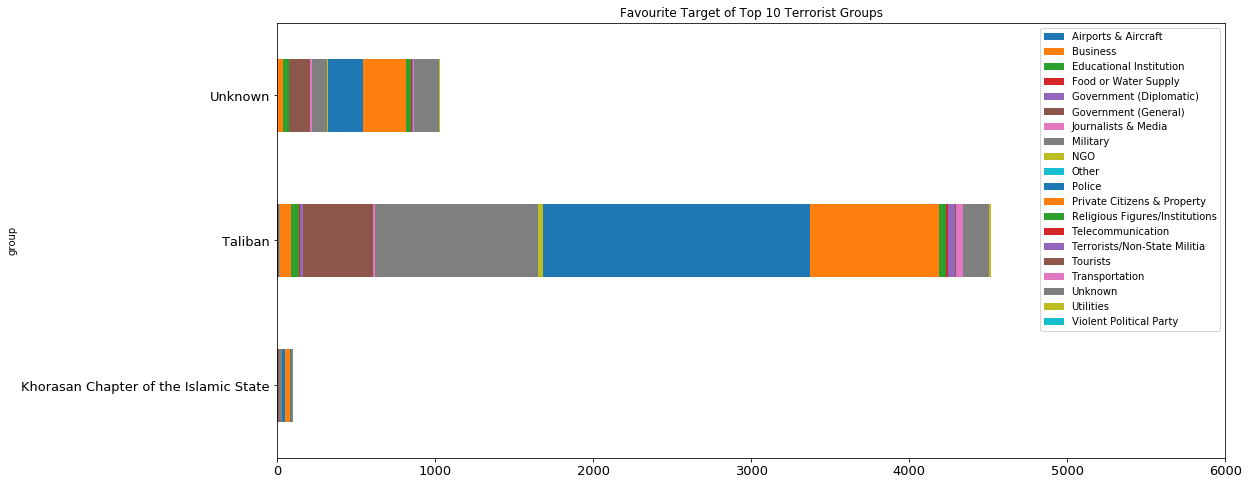

In [102]:
v1=Afghanistan[Afghanistan['group'].isin(Afghanistan['group'].value_counts()[0:3].index)]
pd.crosstab(v1['group'],v1['target']).plot.barh(stacked=True,figsize=(17,8))
plt.title('Favourite Target of Top 10 Terrorist Groups')
plt.xlim(0,6000)
plt.legend(loc=1)

In [103]:
v1=Afghanistan[Afghanistan['group'].isin(Afghanistan['group'].value_counts()[0:5].index)]
v1.weapon_type.nunique()

9

Text(0.5,0.98,'Weapons Used')

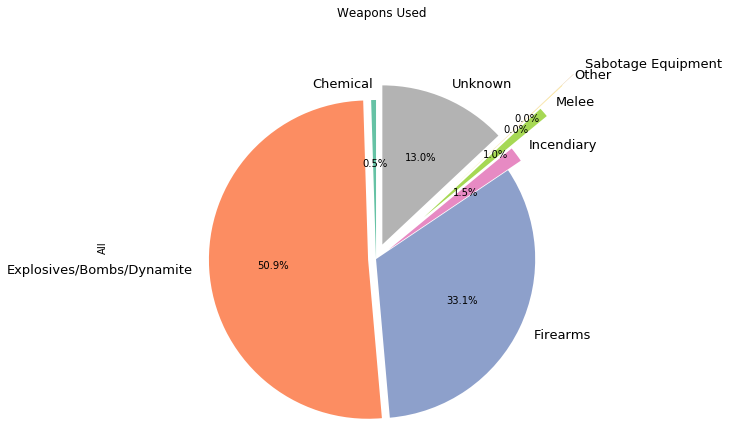

In [104]:
explode=(0.0, 0.05, 0.0, 0.1, 0.4, 0.6,0.7,0.1) #anti clockwise
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-2]
xattack.plot.pie(legend=False,y='All',startangle=90,figsize=(10,7),cmap='Set2',autopct='%1.1f%%',explode=explode) # auto percent
plt.axis('equal')
plt.suptitle('Weapons Used')

### <a id='Terrorism in Iraq'>9. Terrorism in Iraq </a>

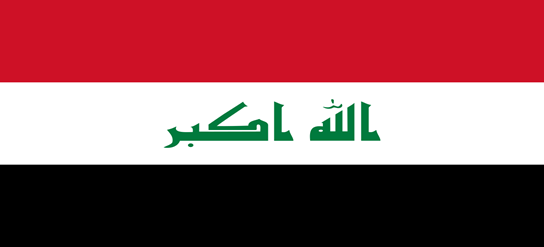

In [105]:
Iraq = data[data['country']=='Iraq']

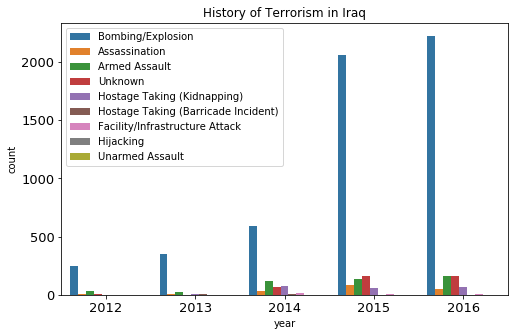

In [106]:
plt.figure(figsize=(8,5))
sns.countplot(x='year',hue='attack',data=Iraq)
plt.title('History of Terrorism in Iraq')
plt.legend(loc=2)

* **Terrorism in Iraq show somewhat same trend as seen globally i.e, bombing/Explosion topped in Attack type.**
* **2016 was the worst year for Iraq as the attack frequency was highest.**
* **We can see almost 3 fold rise in attacks after 2015.**

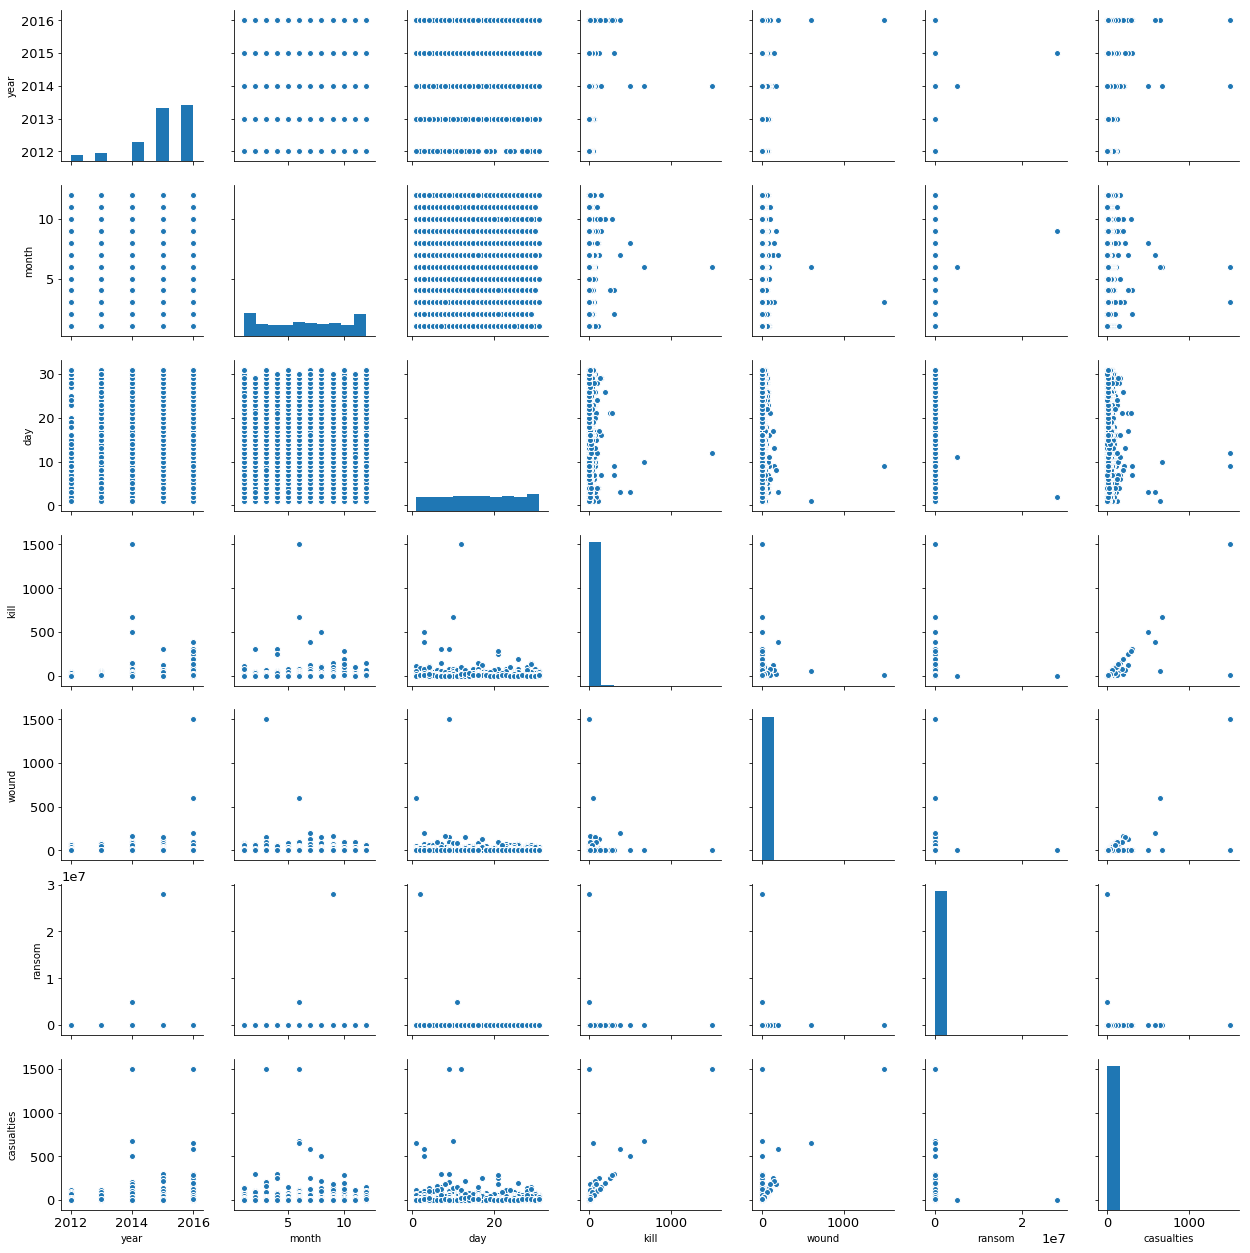

In [107]:
sns.pairplot(Iraq)

### Most Active Terrorist group in Iraq

In [108]:
max_killed = Iraq['kill'].max()
idx = Iraq.loc[Iraq.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,'in',Iraq.at[idx,'city'],Iraq.at[idx,'country'],\
    'through',Iraq.at[idx,'attack'],'by',Iraq.at[idx,'group'],'using',Iraq.at[idx,'weapon_type'],\
    '.Majority of them were',Iraq.at[idx,'target'])

Maximum people killed in an attack are 1500.0 in Tikrit Iraq through Hostage Taking (Kidnapping) by Islamic State of Iraq and the Levant (ISIL) using Firearms .Majority of them were Military


In [109]:
print("Terrorist groups in Iraq is",len(Iraq['group'].unique()),'!')

Terrorist groups in Iraq is 19 !


** 5 Most Active Terrorist Groups with casualties**

In [110]:
grp_cas = Iraq[Iraq['group'].isin(Iraq['group'].value_counts()[0:5].index)][['group','casualties']]\
.groupby('group').sum().reset_index()
grp_cas

group  casualties
0                        Al-Naqshabandiya Army       415.0
1                             Al-Qaida in Iraq      4846.0
2  Islamic State of Iraq and the Levant (ISIL)     45972.0
3                            Muslim extremists       438.0
4                                      Unknown     20729.0

** 5 Most Active Terrorist Groups with attack count**

In [111]:
grp_cnt=Iraq[Iraq['group'].isin(Iraq['group'].value_counts()[0:5].index)]['group'].value_counts().to_frame().reset_index()\
.rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

group  count_of_attack
0                                      Unknown             3365
1  Islamic State of Iraq and the Levant (ISIL)             2959
2                             Al-Qaida in Iraq              359
3                        Al-Naqshabandiya Army               34
4                            Muslim extremists               25

In [112]:
# Merging the two 
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

group  casualties  count_of_attack
2  Islamic State of Iraq and the Levant (ISIL)     45972.0             2959
4                                      Unknown     20729.0             3365
1                             Al-Qaida in Iraq      4846.0              359
3                            Muslim extremists       438.0               25
0                        Al-Naqshabandiya Army       415.0               34

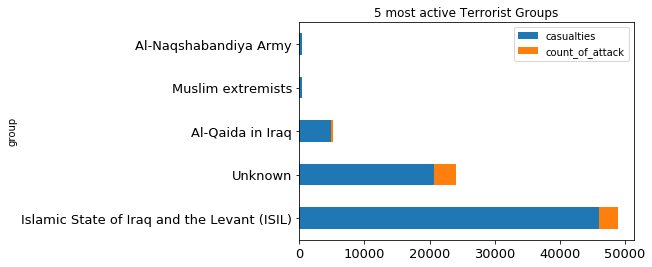

In [113]:
grp.plot.barh(x='group',y=['casualties','count_of_attack'],stacked=True,title='5 most active Terrorist Groups')

* **ISIL is the most active group in Iraq**
* **AI-Qaida has caused greater no. of casuality in less no. of attacks**

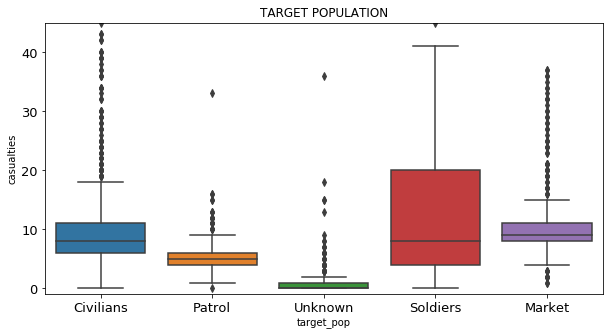

In [114]:
plt.figure(figsize=(10,5))
n1=Iraq[Iraq['target_pop'].isin(Iraq['target_pop'].value_counts()[0:5].index)][['target_pop','casualties']]
plt.ylim(-1,45)
plt.title('TARGET POPULATION')
sns.boxplot(x='target_pop',y='casualties',data=n1)

### Most Affected City in Iraq

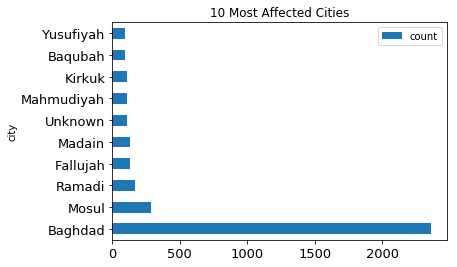

In [115]:
city_cnt=Iraq[Iraq['city'].isin(Iraq['city'].value_counts()[0:10].index)]['city'].value_counts().reset_index()\
.rename(columns={'index':'city','city':'count'})
city_cnt.plot.barh(x='city',title='10 Most Affected Cities')

**Baghdad is the most affected city, witnessing more than twice the number of attacks**

### Targets of top 5 Terrorist Groups 

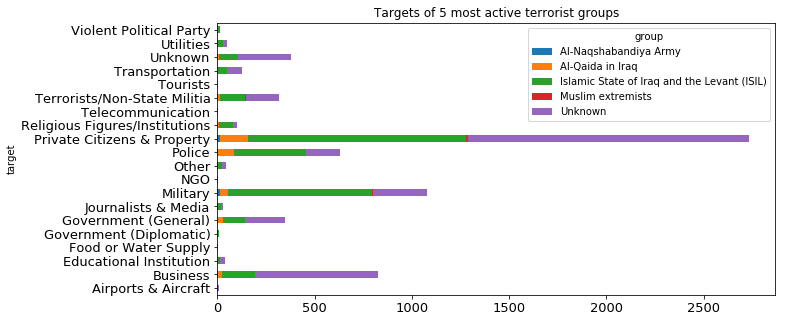

In [116]:
v1=Iraq[Iraq['group'].isin(Iraq['group'].value_counts()[0:5].index)]
pd.crosstab(v1['target'],v1['group']).plot.barh(stacked=True,figsize=(10,5),title='Targets of 5 most active terrorist groups')

* **ISIL mostly target Police, Private Citizen and Property,Military and Business**
* **Private Citizen and Property were mostly damaged by these groups**

In [117]:
len(Iraq.weapon_type.unique())

8

Text(0.5,0.98,'Weapons Used')

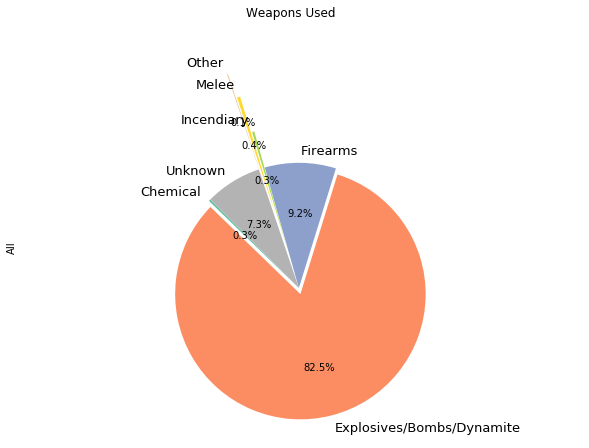

In [118]:
explode=(0.0, 0.05, 0.0, 0.3, 0.6, 0.8, 0.0) #anti clockwise
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-2]
xattack.plot.pie(legend=False,y='All',startangle=135,figsize=(10,7),cmap='Set2',autopct='%1.1f%%',explode=explode) # auto percent
plt.axis('equal')
plt.suptitle('Weapons Used')

* **Explosives were mainly used by majority of the terrorist groups to spread its terror.**

### <a id='Terrorism in Syria'>10. Terrorism in Syria </a>

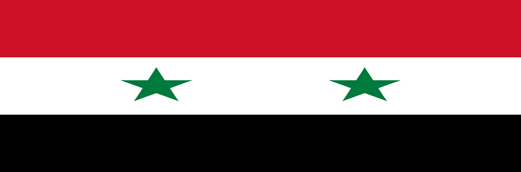

In [119]:
Syria = data[data['country']=='Syria']

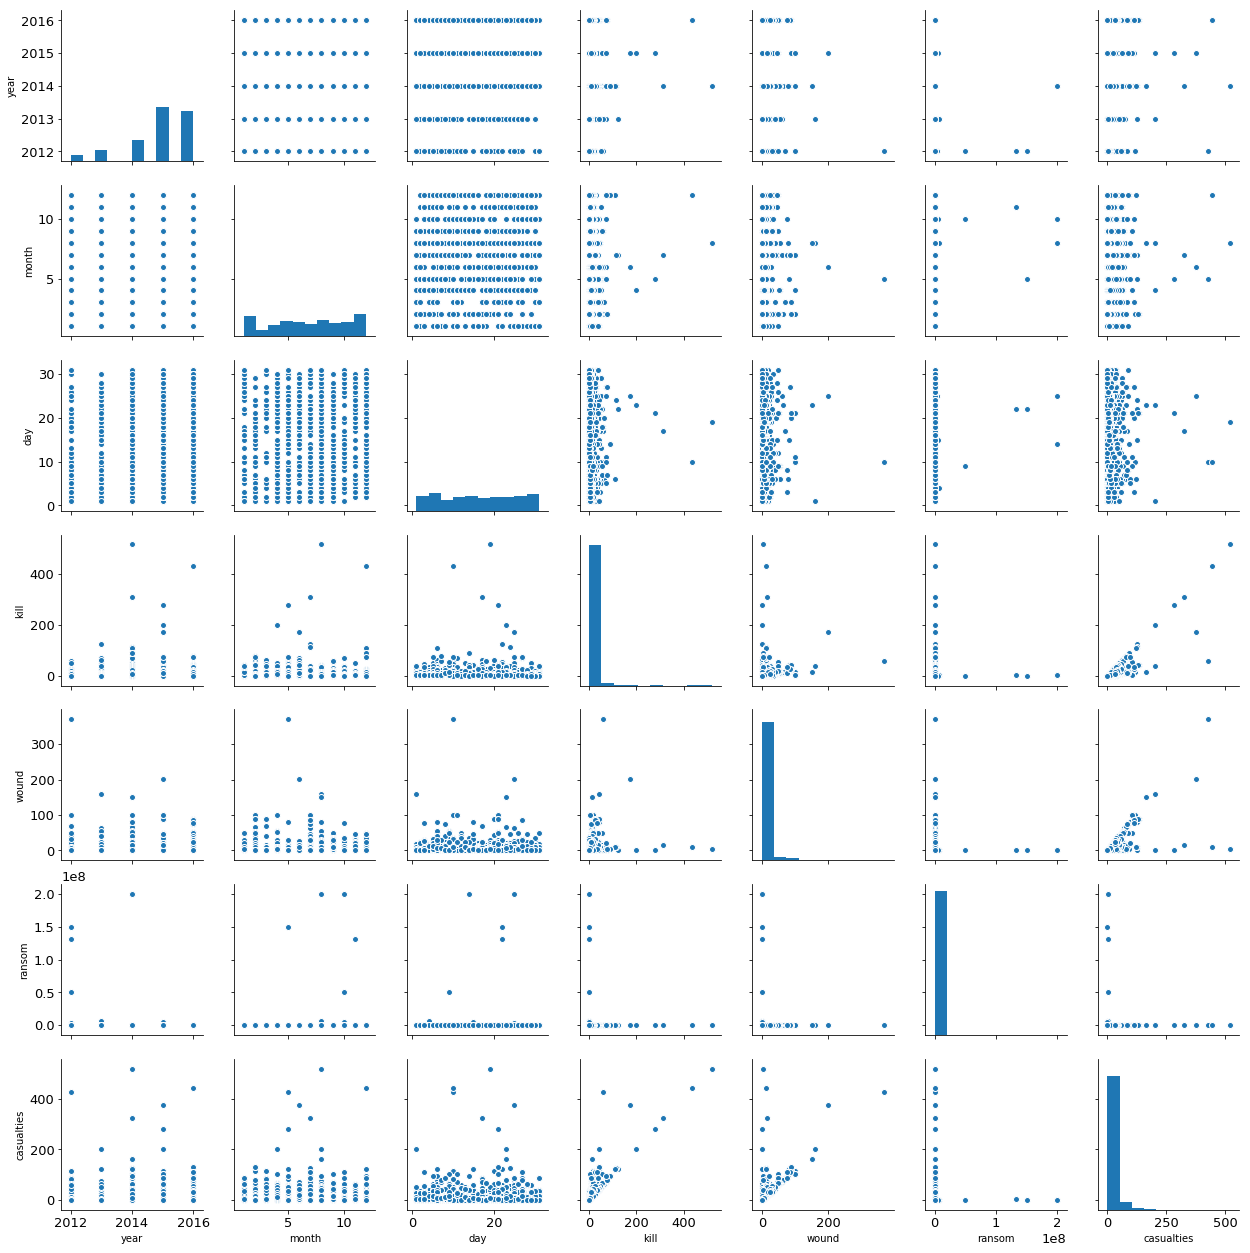

In [120]:
sns.pairplot(Syria)

Text(0.5,1,'History of Terrorism')

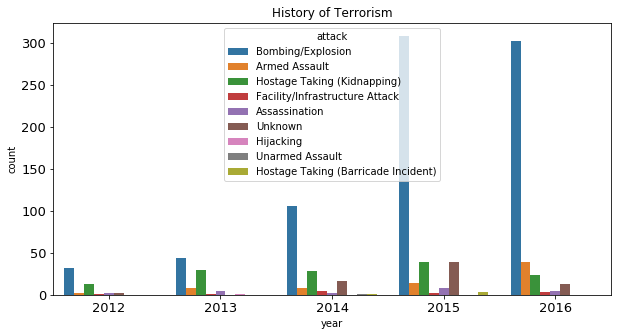

In [121]:
plt.figure(figsize=(10,5))
sns.countplot(x='year',hue='attack',data=Syria)
plt.title('History of Terrorism')

### Most Active Terrorist group in Syria

In [122]:
max_killed = Syria['kill'].max()
idx = Syria.loc[Syria.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,'in',Syria.at[idx,'city'],Syria.at[idx,'country'],\
    'through',Syria.at[idx,'attack'],'by',Syria.at[idx,'group'],'using',Syria.at[idx,'weapon_type'],\
    '.Majority of them were',Syria.at[idx,'target'])

Maximum people killed in an attack are 517.0 in Unknown Syria through Hostage Taking (Kidnapping) by Islamic State of Iraq and the Levant (ISIL) using Explosives/Bombs/Dynamite .Majority of them were Military


In [123]:
print("The no. of Terrorist groups in Syria is",len(Syria['group'].unique()),'!')

The no. of Terrorist groups in Syria is 47 !


** 5 Most Active Terrorist Groups with casualties**

In [124]:
grp_cas = Syria[Syria['group'].isin(Syria['group'].value_counts()[0:5].index)][['group','casualties']]\
.groupby('group').sum().reset_index()
grp_cas

group  casualties
0                              Al-Nusrah Front      5341.0
1                             Free Syrian Army       670.0
2  Islamic State of Iraq and the Levant (ISIL)      9056.0
3                            Muslim extremists       640.0
4                                      Unknown      1932.0

** 5 Most Active Terrorist Groups with attack count**

In [125]:
grp_cnt=Syria[Syria['group'].isin(Syria['group'].value_counts()[0:5].index)]['group'].value_counts().reset_index()\
.rename(columns={'index':'group','group':'count_of_attack'})
grp_cnt

group  count_of_attack
0  Islamic State of Iraq and the Levant (ISIL)              386
1                                      Unknown              206
2                              Al-Nusrah Front              201
3                             Free Syrian Army               80
4                            Muslim extremists               57

In [126]:
# Merging the two 
grp = grp_cas.merge(grp_cnt, on = 'group').sort_values(by='casualties',ascending=False)
grp

group  casualties  count_of_attack
2  Islamic State of Iraq and the Levant (ISIL)      9056.0              386
0                              Al-Nusrah Front      5341.0              201
4                                      Unknown      1932.0              206
1                             Free Syrian Army       670.0               80
3                            Muslim extremists       640.0               57

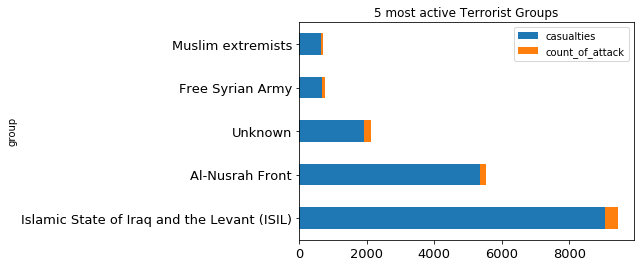

In [127]:
grp.plot.barh(x='group',y=['casualties','count_of_attack'],stacked=True,title='5 most active Terrorist Groups')

**Islamic State of Iraq and the Levant (ISIL) is most active, causing greater casualities in less attacks**

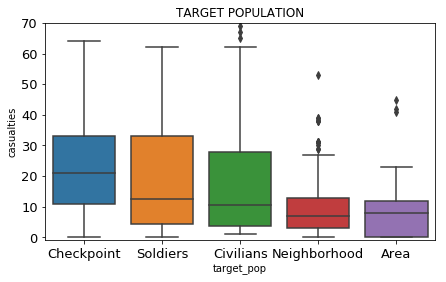

In [128]:
plt.figure(figsize=(7,4))
n1=Syria[Syria['target_pop'].isin(Syria['target_pop'].value_counts()[0:5].index)][['target_pop','casualties']]
plt.ylim(-1,70)
plt.title('TARGET POPULATION')
sns.boxplot(x='target_pop',y='casualties',data=n1)

### Most Affected City in Syria

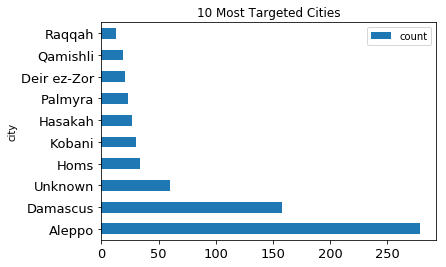

In [129]:
Syria[Syria['city'].isin(Syria['city'].value_counts()[0:10].index)]['city'].value_counts().reset_index()\
.rename(columns={'index':'city','city':'count'}).plot.barh(x='city',title='10 Most Targeted Cities')

**Aleppo is the most affected city. Attacks also occured in capital Damascus.**

Text(0.5,1,'Targets of 5 Most Active Terrorist Groups')

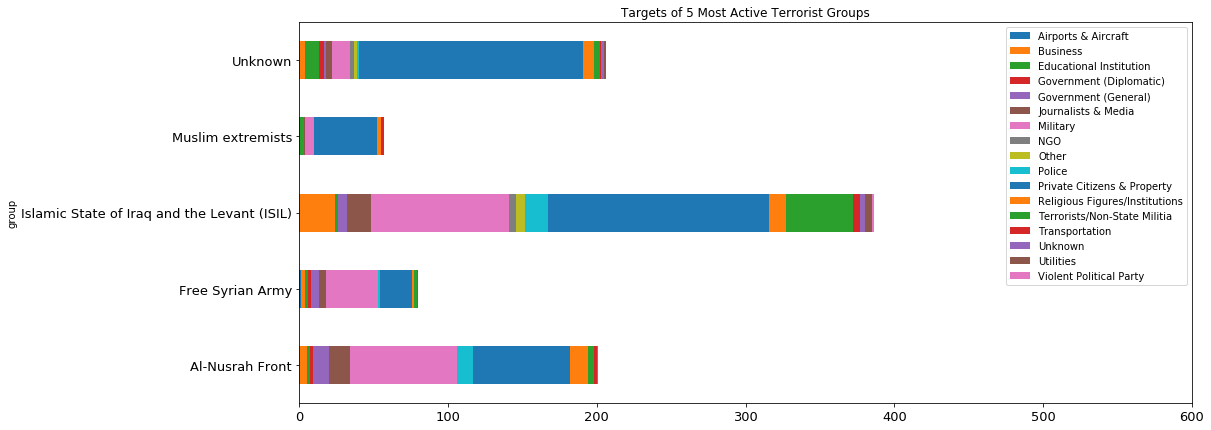

In [130]:
v1=Syria[Syria['group'].isin(Syria['group'].value_counts()[0:5].index)]
pd.crosstab(v1['group'],v1['target']).plot.barh(stacked=True,figsize=(16,7))
plt.legend(loc='best')
plt.xlim(0,600)
plt.title('Targets of 5 Most Active Terrorist Groups')

In [131]:
len(Syria.weapon_type.unique())

9

Text(0.5,0.98,'Weapons Used')

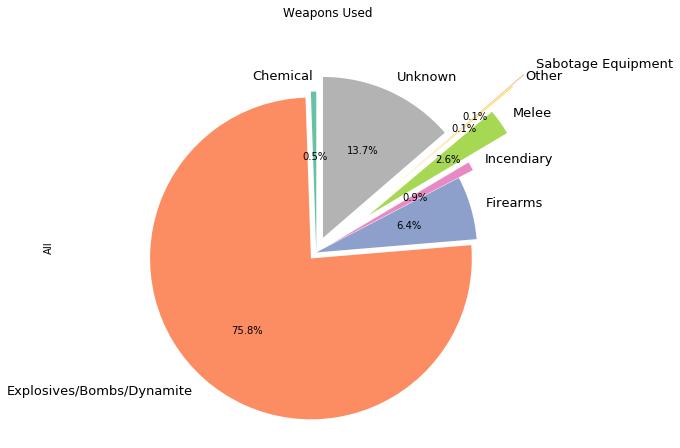

In [132]:
explode=(0.0, 0.05, 0.0, 0.1, 0.4, 0.6,0.7,0.1) #anti clockwise
xattack=pd.crosstab(v1['weapon_type'],v1['group'],margins='All')
xattack=xattack[0:-2]
xattack.plot.pie(legend=False,y='All',startangle=90,figsize=(10,7),cmap='Set2',autopct='%1.1f%%',explode=explode) # auto percent
plt.axis('equal')
plt.suptitle('Weapons Used')

* **The reason for higher no. of casualties in less no. of attack by the terrorist group seems**
  **clear as explosives were used (around 92.1 %). The armed Assault was the second type of weapon**
  **user for terrorising.**

### <a id='Terrorism in Nigeria'>11. Terrorism in Nigeria </a>

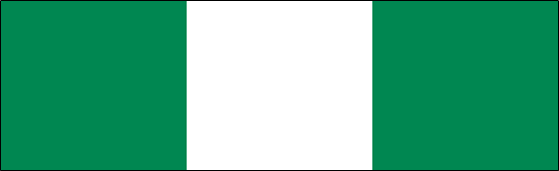

In [133]:
nig=data[data.country=='Nigeria']
nig.describe()

year        month          day         kill        wound  \
count  2183.000000  2183.000000  2183.000000  2183.000000  2183.000000   
mean   2014.206596     6.063216    15.646358     8.240495     3.794320   
std       1.375747     3.420250     8.973711    17.991070    12.618978   
min    2012.000000     1.000000     1.000000     0.000000     0.000000   
25%    2013.000000     3.000000     8.000000     1.000000     0.000000   
50%    2014.000000     6.000000    15.000000     3.000000     1.000000   
75%    2015.000000     9.000000    24.000000     8.000000     2.000000   
max    2016.000000    12.000000    31.000000   315.000000   270.000000   

             ransom   casualties  
count  2.183000e+03  2183.000000  
mean   1.786255e+03    12.034814  
std    6.557930e+04    24.562248  
min   -9.900000e+01     0.000000  
25%    0.000000e+00     1.000000  
50%    0.000000e+00     4.000000  
75%    0.000000e+00    12.000000  
max    3.029020e+06   392.000000

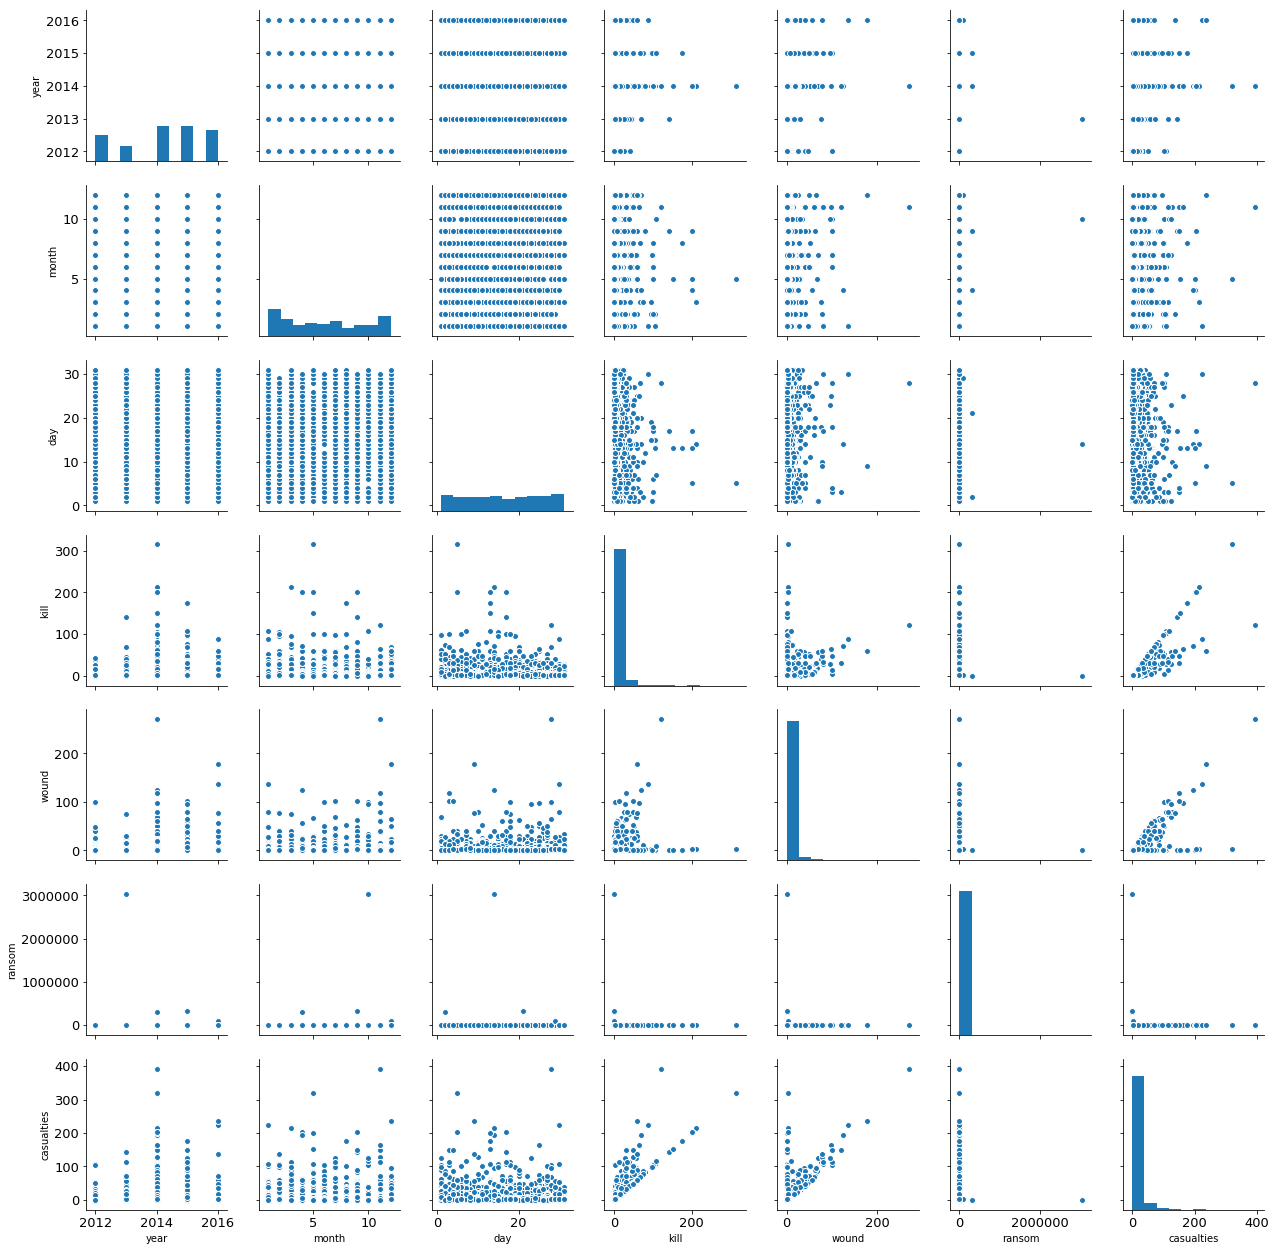

In [134]:
sns.pairplot(nig)

In [135]:
max_killed = nig['kill'].max()
idx = nig.loc[nig.kill==max_killed].index[0]
print('Maximum people killed in an attack are',max_killed,\
      '\nin the',nig.at[idx,'city'],\
     '\nwhich was carried by',nig.at[idx,'group'],'using',nig.at[idx,'weapon_type'],\
     '\nand maximum people killed were',nig.at[idx,'target'],'who were attacked with',nig.at[idx,'attack'])

Maximum people killed in an attack are 315.0 
in the Gamboru Ngala 
which was carried by Boko Haram using Explosives/Bombs/Dynamite 
and maximum people killed were Private Citizens & Property who were attacked with Armed Assault


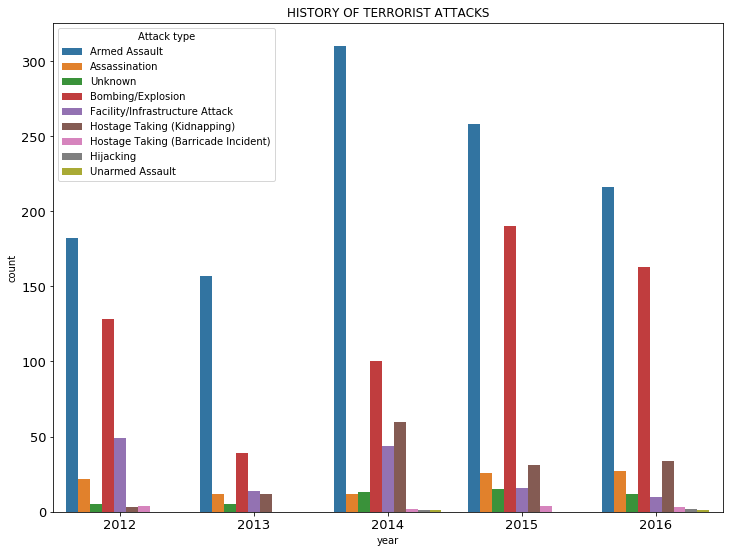

In [136]:
plt.figure(figsize=(12,9))
sns.countplot(x=nig.year,hue = 'attack', data = nig)
plt.title("HISTORY OF TERRORIST ATTACKS")
plt.legend(title='Attack type',loc=2)

* After 2014 there has been slight decrease in attacks. 2013 saw comparitively less attacks among others
* Armed assault extensively used

Text(0.5,1,'MOST TARGETED CITIES')

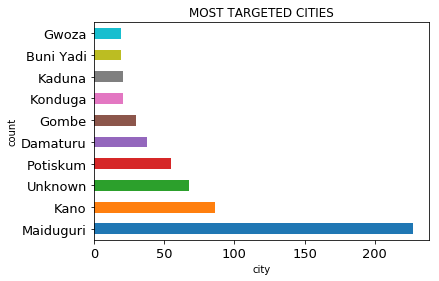

In [137]:
nig[nig['city'].isin(nig['city'].value_counts()[0:10].index)]['city'].value_counts().plot.barh()
plt.xlabel('city')
plt.ylabel('count')
plt.title("MOST TARGETED CITIES")

Maiduguri is the epicentre of most attacks.

In [138]:
print("The no. of Terrorist groups in Nigeria is",len(nig['group'].unique()))

The no. of Terrorist groups in Nigeria is 25


Text(0.5,1,'Most Active Terrorist groups')

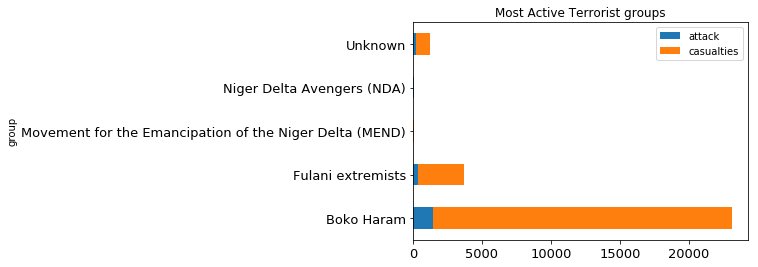

In [139]:
x=nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]
x[['group','casualties']].groupby('group').sum().merge(x['group'].value_counts().reset_index()\
.rename(columns={'index':'group','group':'attack'}), on='group').plot.barh(x='group',y=['attack','casualties'],stacked=True)
plt.title("Most Active Terrorist groups")

* Boko Haram is the most successful terrorist group, followed by Fulani extremists. 
* Boko Haram originates from West Africa

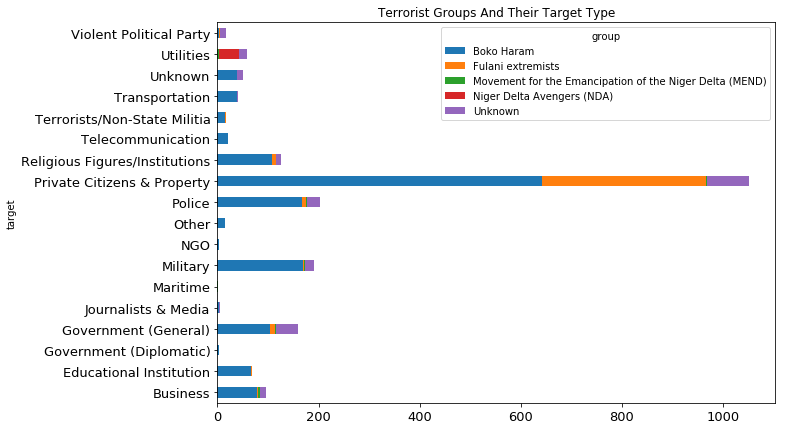

In [140]:
n1=nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]
pd.crosstab(n1['target'],n1['group']).plot.barh(stacked=True,figsize=(10,7),title='Terrorist Groups And Their Target Type')

Boko Haram and Fulani extremists have majorly attacked private citizens and property. Military,police and utilities are victomized too.

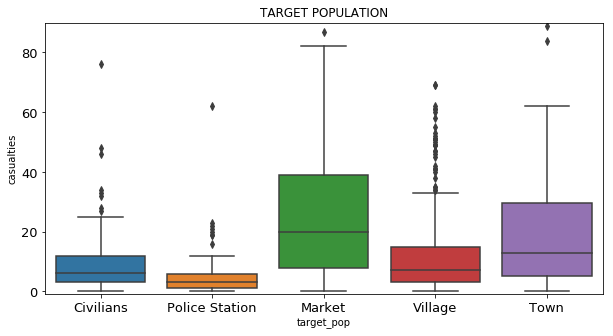

In [141]:
plt.figure(figsize=(10,5))
n1=nig[nig['target_pop'].isin(nig['target_pop'].value_counts()[0:5].index)][['target_pop','casualties']]
plt.ylim(-1,90)
plt.title('TARGET POPULATION')
sns.boxplot(x='target_pop',y='casualties',data=n1)

(0, 1200)

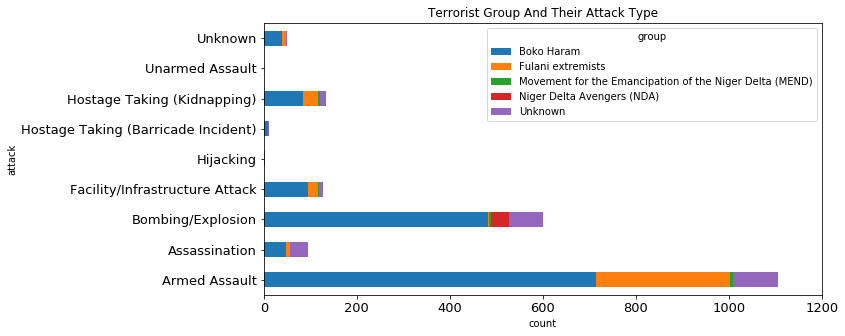

In [142]:
n1=nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]
pd.crosstab(n1['attack'],n1['group']).plot.barh(stacked=True,figsize=(10,5))
plt.xlabel('count')
plt.title('Terrorist Group And Their Attack Type')
plt.xlim(0,1200)

Armed assault and bombing/explosion extensively used by Boko Haram.

In [143]:
len(nig.weapon_type.unique())

6

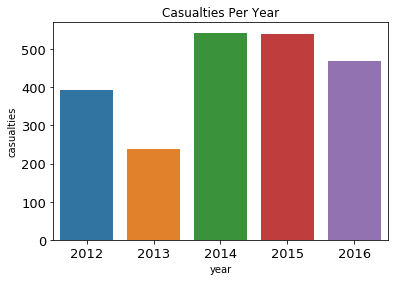

In [144]:
plt.title('Casualties Per Year')
v1=nig['year'].value_counts().reset_index().rename(columns={'index':'year','year':'casualties'}).sort_values(by='year')
sns.barplot(data=v1,x='year',y='casualties',ci=None)

2015 and 2014 saw almost same number of casualties

Text(0.5,1,'Terrorist Groups And Their Period Of Existence')

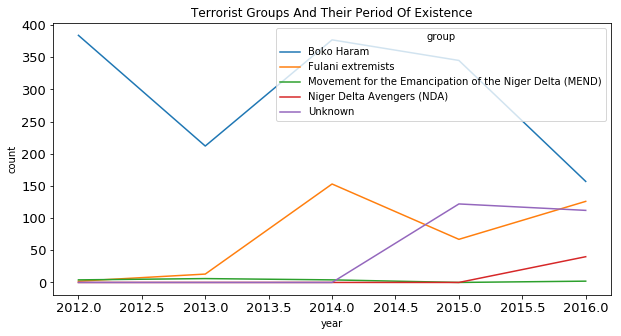

In [145]:
x=nig[nig['group'].isin(nig['group'].value_counts()[0:5].index)]
pd.crosstab(x['year'],x['group']).plot(figsize=(10,5))
plt.ylabel('count')
plt.title('Terrorist Groups And Their Period Of Existence')

* Boko Haram showed sharp decrease in their attacks in 2013, then a rise next year, then again a slight fall in 2015, then a steep fall in 2016. 
* Fulani extremists suddenly came into existence in 2014, going down, then up, after that.
* Niger Delta Avengers came into limelight in 2016
* Hence there is no consistency in the attack number by all groups 

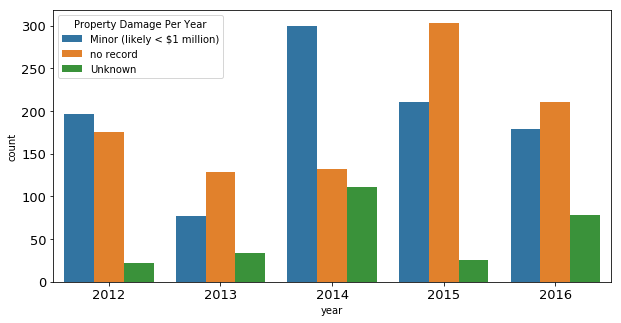

In [146]:
plt.figure(figsize=(10,5))
sns.countplot(x='year',hue='property_damg',data=nig)
plt.legend(title="Property Damage Per Year")

Major property damage occured in 2014 